In [38]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec

from gwbird import pls
from gwbird.skymap import Skymaps
from gwbird.overlap import Response
from gwbird.nell import AngularResponse, Sensitivity_ell

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example notebook for ET 2L $\alpha =0^{\circ}$

* Response (Overlap Reduction function)

Calculating Overlaps ET 2L alpha=0
- tensor modes
- vector modes
- scalar modes
-V


Text(0.5, 1.0, 'ET 2L $\\alpha=0^{\\circ}$ Overlap Reduction Function')

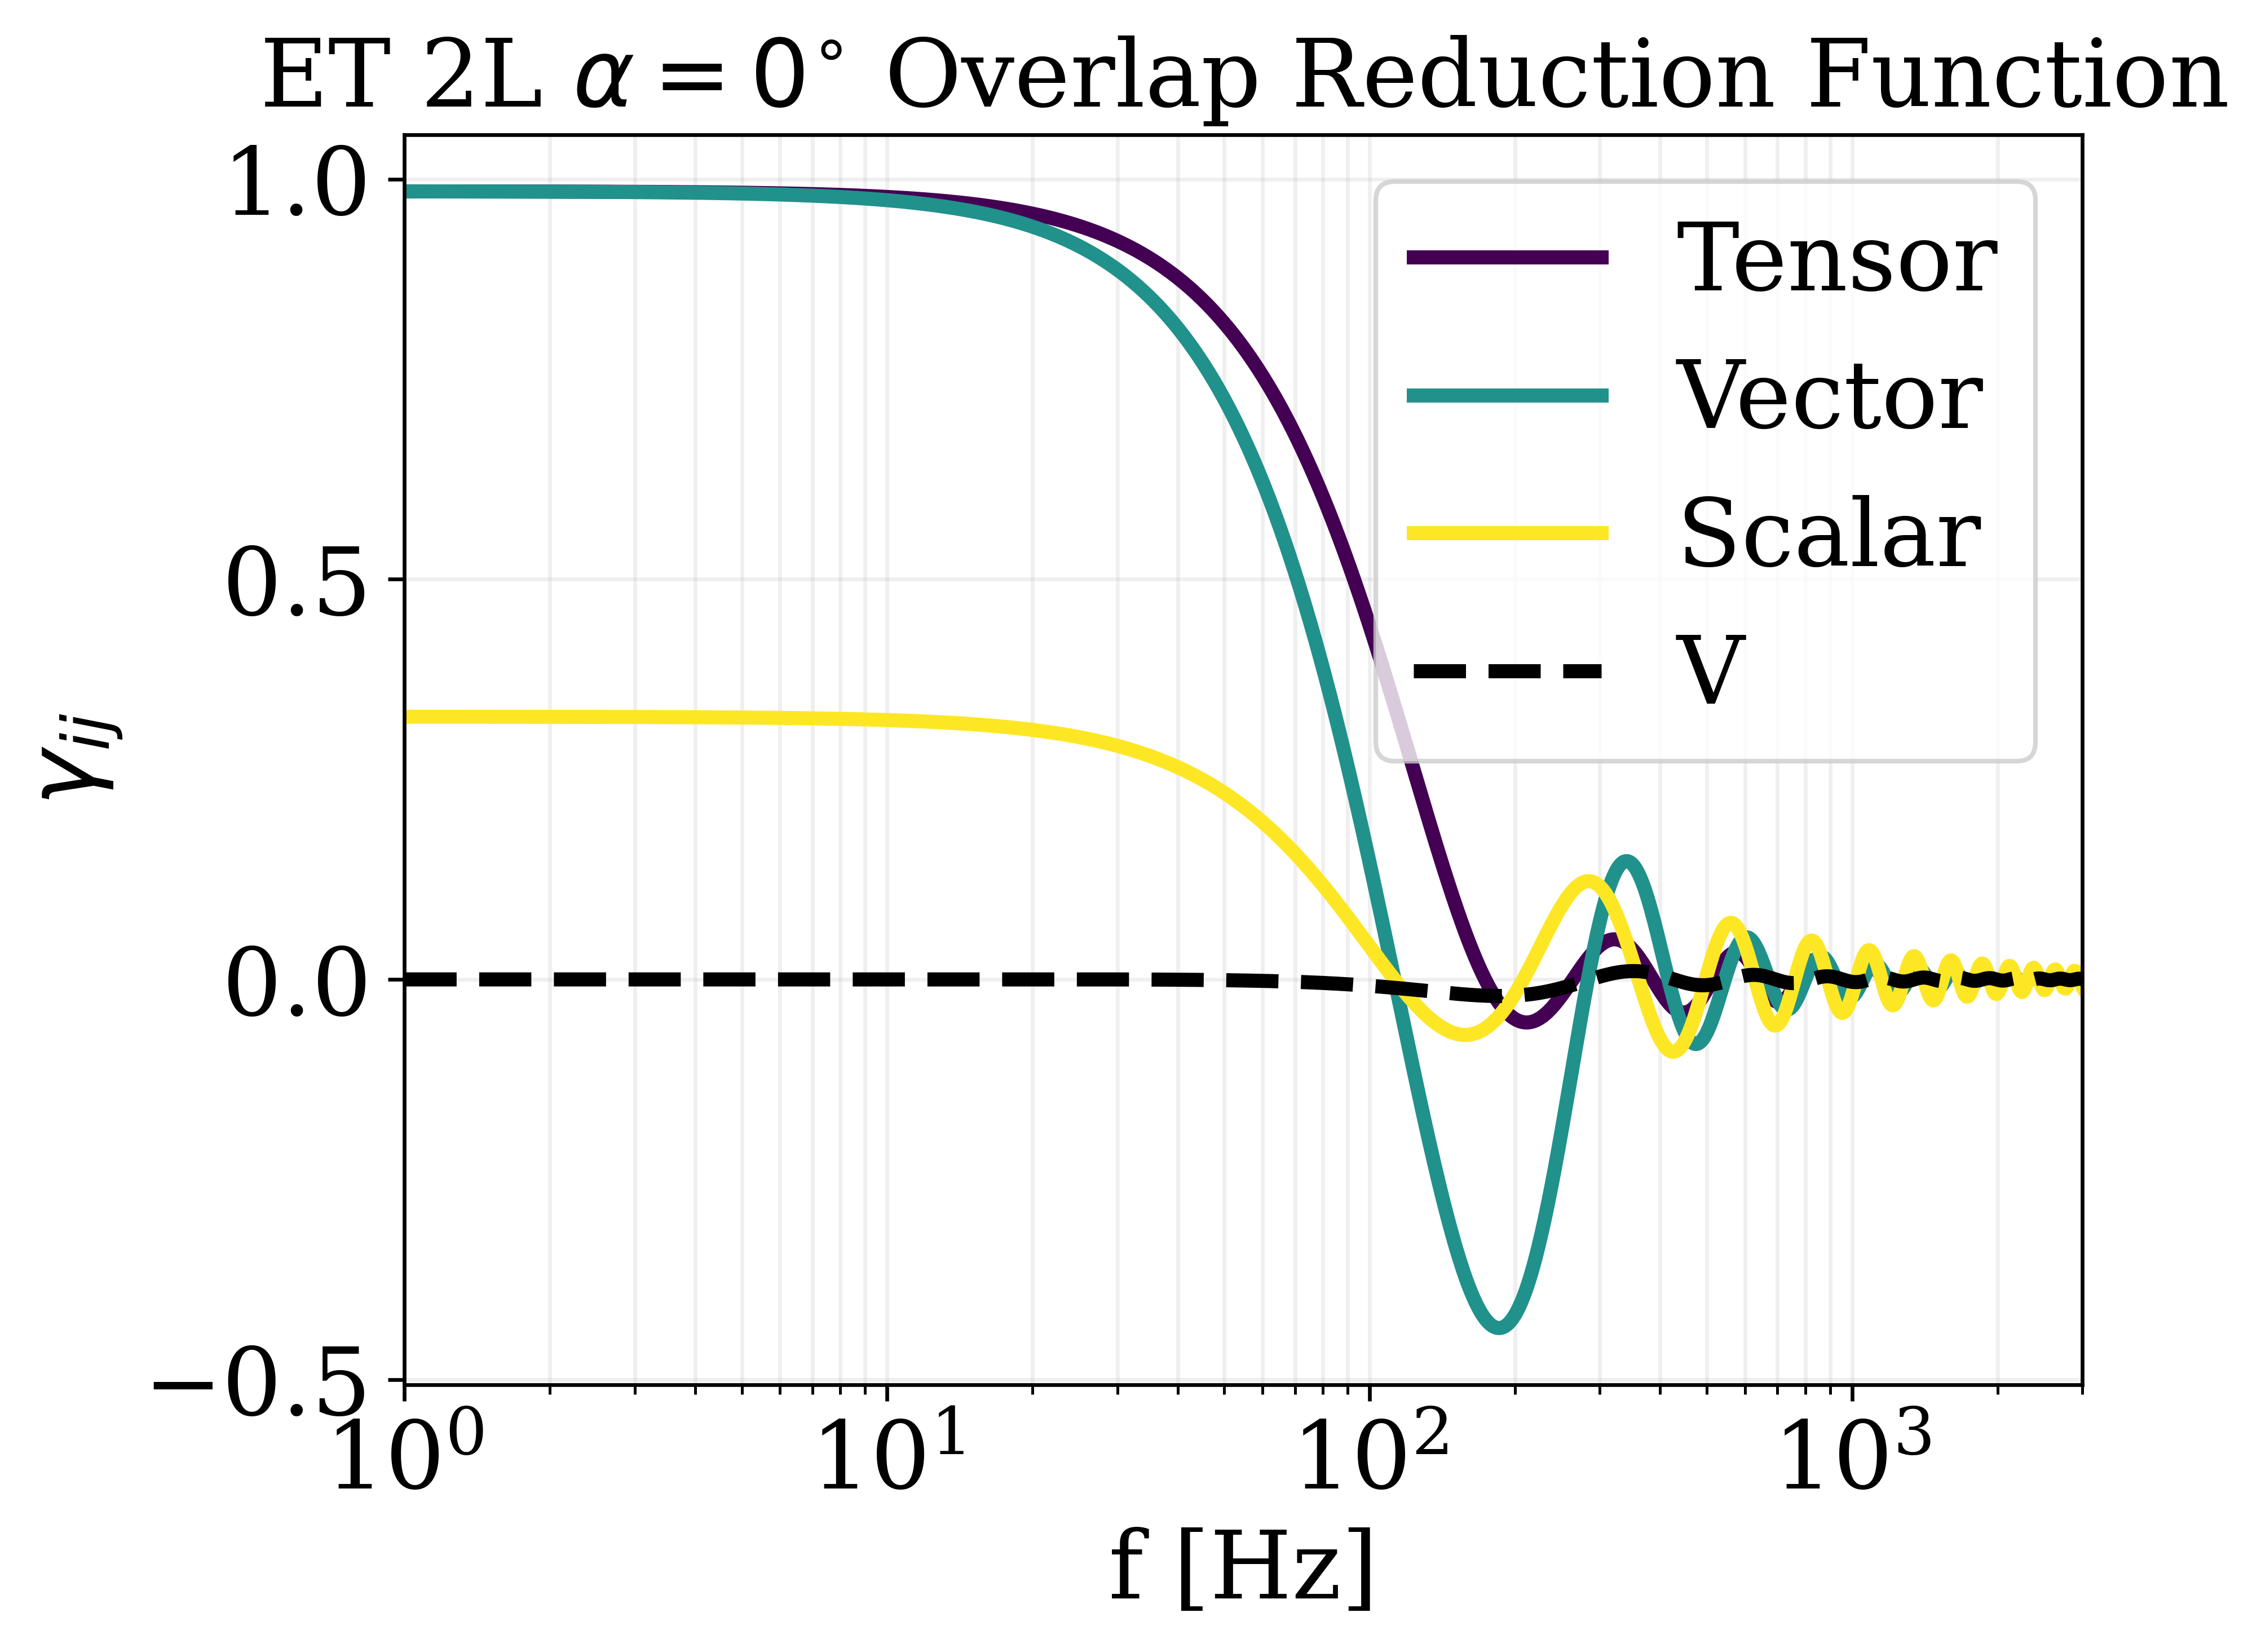

In [50]:
f = np.logspace(0, np.log10(3000), 1000)

print('Calculating Overlaps ET 2L alpha=0')
print('- tensor modes')
R_t = Response.overlap('ET L1', 'ET L2', f, 0, 't', shift_angle=np.deg2rad(0))
print('- vector modes')
R_v = Response.overlap('ET L1', 'ET L2', f, 0, 'v', shift_angle=np.deg2rad(0))
print('- scalar modes')
R_s = Response.overlap('ET L1', 'ET L2', f, 0, 's', shift_angle=np.deg2rad(0))
print('-V')
R_V = Response.overlap('ET L1', 'ET L2', f, 0, 'V', shift_angle=np.deg2rad(0))

colors = cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, R_t, label='Tensor', color = colors[0], rasterized=True) 
plt.plot(f, R_v, label='Vector', color = colors[1], rasterized=True)
plt.plot(f, R_s, label='Scalar', color = colors[2], rasterized=True)
plt.plot(f, R_V, label='V', color = 'black', linestyle='--', rasterized=True)
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\gamma_{ij}$')
plt.grid(alpha=0.2, which='both')
plt.legend(loc='upper right')
plt.xlim(1, 3000)
plt.title(r'ET 2L $\alpha=0^{\circ}$ Overlap Reduction Function')

In [40]:
print(R_t[0]/R_s[0])

3.0000276349469046


* Power Law Integrated Sensitivity Curve

Min pls_t: 1.3111132850455664e-13 f min: 8.034456110830362
Min pls_v: 1.3178131954378822e-13 f min: 7.970322250704167
Min pls_s: 3.95942915929789e-13 f min: 7.970322250704167
Min pls_V: 3.5608965716940034e-10 f min: 100.31042432468787


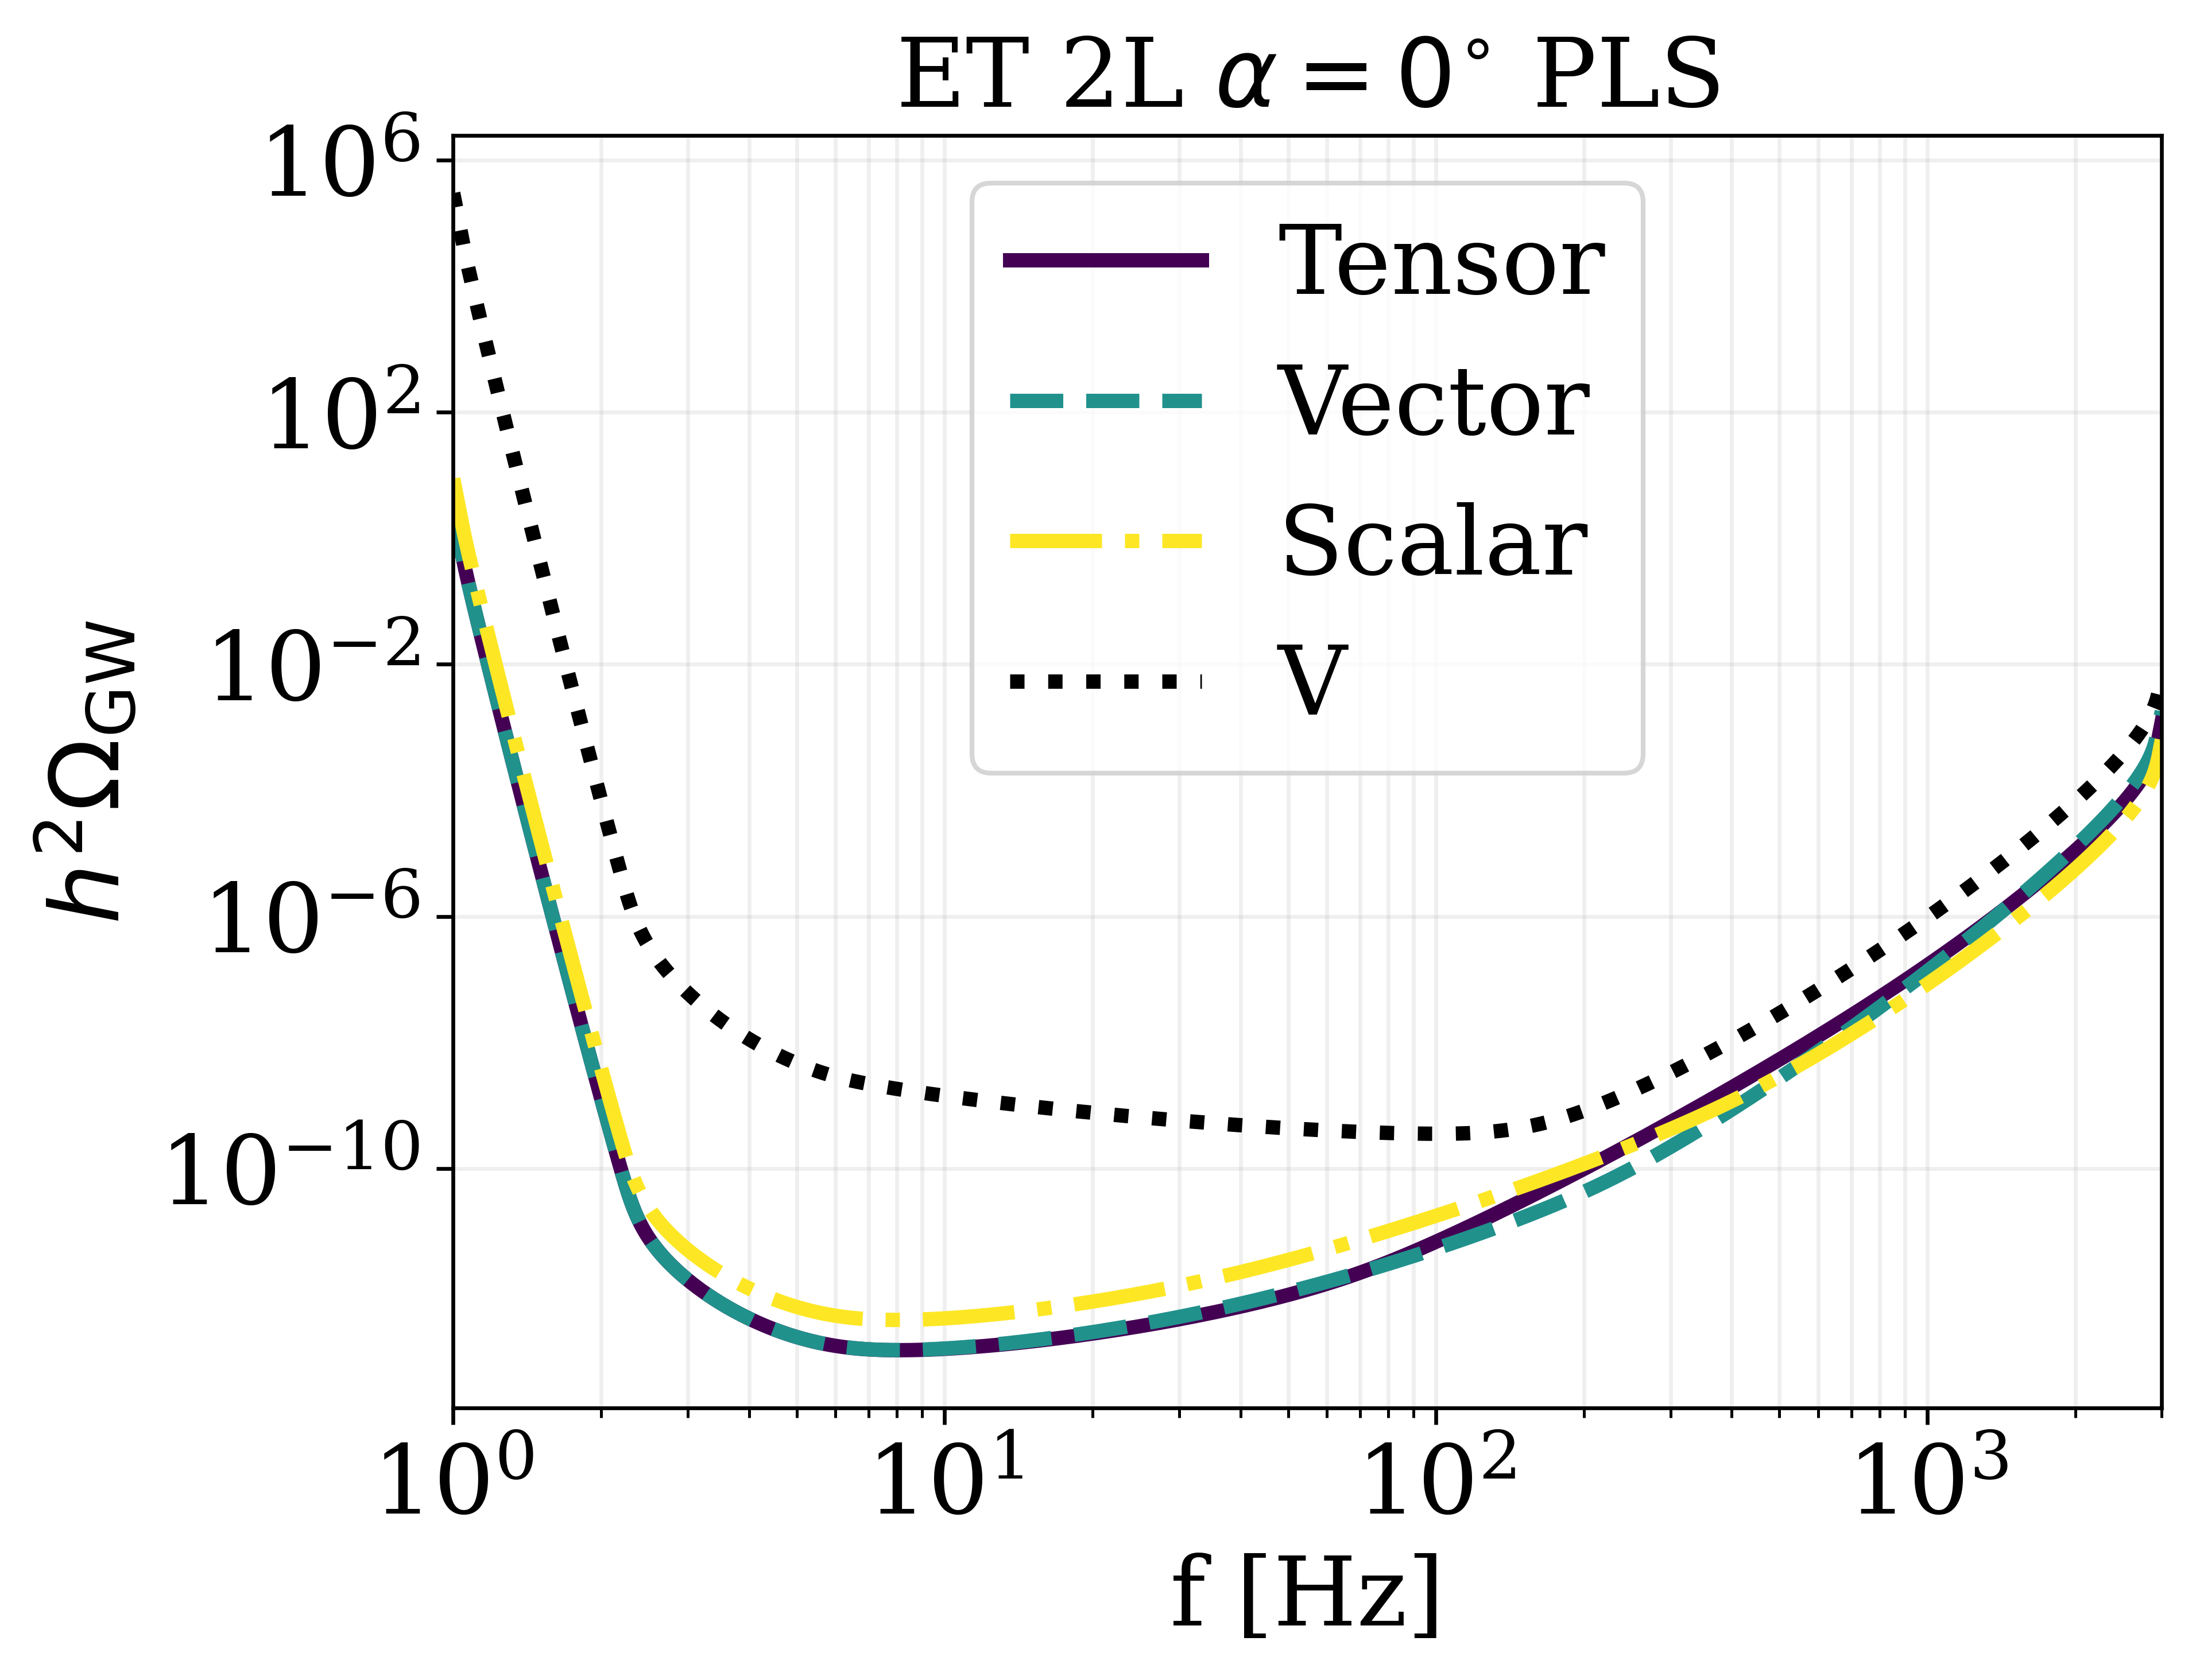

In [41]:
f = np.logspace(0, np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1


pls_t = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr, Tobs, 0, shift_angle=np.deg2rad(0))
pls_v = pls.PLS('ET L1', 'ET L2', f, fref, 'v', snr, Tobs, 0, shift_angle=np.deg2rad(0))
pls_s = pls.PLS('ET L1', 'ET L2', f, fref, 's', snr, Tobs, 0, shift_angle=np.deg2rad(0))
pls_V = pls.PLS('ET L1', 'ET L2', f, fref, 'V', snr, Tobs, 0, shift_angle=np.deg2rad(0))

idx_min_t = np.argmin(pls_t)
idx_min_v = np.argmin(pls_v)
idx_min_s = np.argmin(pls_s)
idx_min_V = np.argmin(pls_V)

print("Min pls_t:", pls_t[idx_min_t], "f min:", f[idx_min_t])
print("Min pls_v:", pls_v[idx_min_v], "f min:", f[idx_min_v])
print("Min pls_s:", pls_s[idx_min_s], "f min:", f[idx_min_s])
print("Min pls_V:", pls_V[idx_min_V], "f min:", f[idx_min_V])

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_t, label='Tensor', color=colors[0], rasterized=True)
plt.plot(f, pls_v, label='Vector', color=colors[1], linestyle='--', rasterized=True)
plt.plot(f, pls_s, label='Scalar', color=colors[2], linestyle='-.', rasterized=True)
plt.plot(f, pls_V, label='V', color='black', linestyle=':', rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.title(r'ET 2L $\alpha=0^{\circ}$ PLS')
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 3000)
plt.legend()

* Angular Response

In [42]:
f = np.logspace(0, np.log10(3000), 1000)

print('Calculating Angular response for the monopole...')   
print('- tensor modes')
R0_t = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 't', 0, shift_angle=np.deg2rad(0))
print('- vector modes')
R0_v = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 'v', 0, shift_angle=np.deg2rad(0))
print('- scalar modes')
R0_s = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 's', 0, shift_angle=np.deg2rad(0))
print('-V')
R0_V = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 'V', 0, shift_angle=np.deg2rad(0))

print('Calculating Angular response for the dipole...')   
print('- tensor modes')
R1_t = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 't', 0, shift_angle=np.deg2rad(0))
print('- vector modes')
R1_v = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 'v', 0, shift_angle=np.deg2rad(0))
print('- scalar modes')
R1_s = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 's', 0, shift_angle=np.deg2rad(0))
print('-V')
R1_V = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 'V', 0, shift_angle=np.deg2rad(0))

print('Calculating Angular response for the quadrupole...')   
print('- tensor modes')
R2_t = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 't', 0, shift_angle=np.deg2rad(0))
print('- vector modes')
R2_v = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 'v', 0, shift_angle=np.deg2rad(0))
print('- scalar modes')
R2_s = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 's', 0, shift_angle=np.deg2rad(0))
print('-V')
R2_V = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 'V', 0, shift_angle=np.deg2rad(0))

print('Calculating Angular response for the octupole...')   
print('- tensor modes')
R3_t = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 't', 0, shift_angle=np.deg2rad(0))
print('- vector modes')
R3_v = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 'v', 0, shift_angle=np.deg2rad(0))
print('- scalar modes')
R3_s = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 's', 0, shift_angle=np.deg2rad(0))
print('-V')
R3_V = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 'V', 0, shift_angle=np.deg2rad(0))


Calculating Angular response for the monopole...
- tensor modes
- vector modes
- scalar modes
-V
Calculating Angular response for the dipole...
- tensor modes
- vector modes
- scalar modes
-V
Calculating Angular response for the quadrupole...
- tensor modes
- vector modes
- scalar modes
-V
Calculating Angular response for the octupole...
- tensor modes
- vector modes
- scalar modes
-V


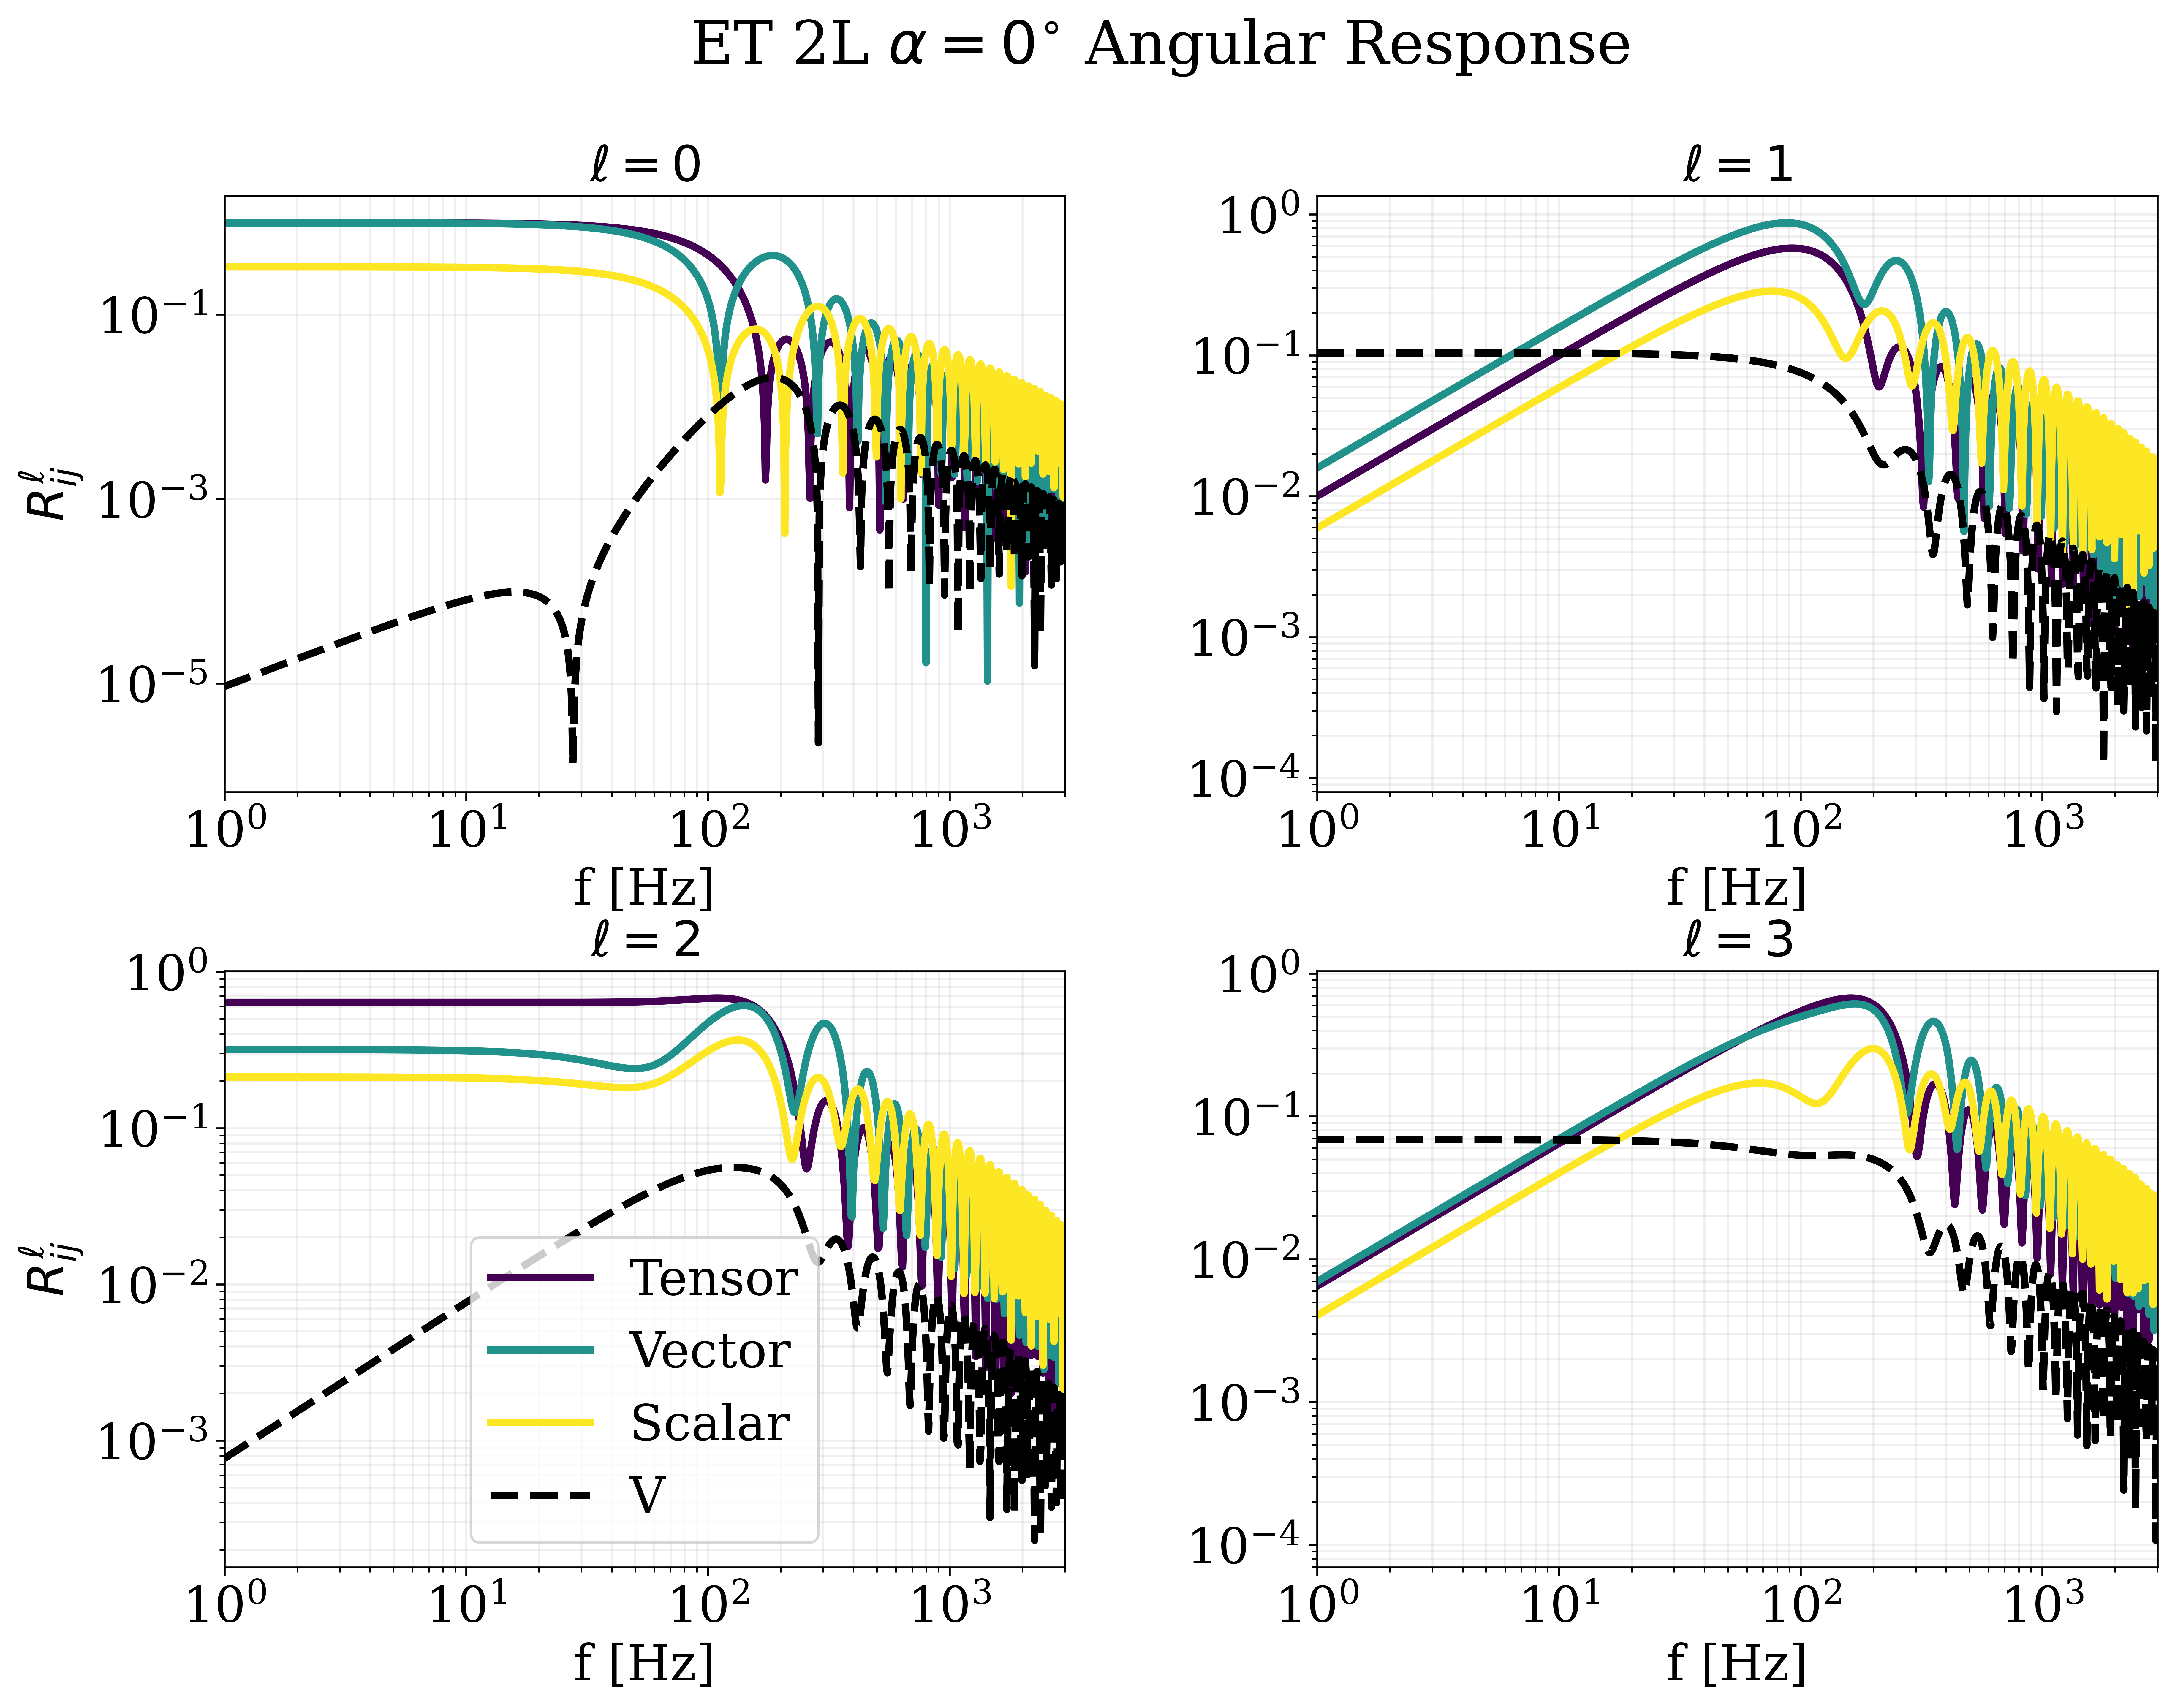

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})


# monopole
axs[0, 0].plot(f, R0_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 0].plot(f, R0_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 0].plot(f, R0_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 0].plot(f, R0_V, label='V', color='black', linestyle='--', rasterized=True)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('f [Hz]')
axs[0, 0].set_ylabel(r'$R_{ij}^{\ell}$')
#axs[0, 0].legend()
axs[0, 0].grid(alpha=0.2, which='both')
axs[0, 0].set_xlim(1, 3000)
axs[0, 0].set_title(r'$\ell = 0$')


# dipole
axs[0, 1].plot(f, R1_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 1].plot(f, R1_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 1].plot(f, R1_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 1].plot(f, R1_V, label='V', color='black', linestyle='--', rasterized=True)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('f [Hz]')
#axs[0, 1].legend()
axs[0, 1].set_xlim(1, 3000)
axs[0, 1].grid(alpha=0.2, which='both')

axs[0, 1].set_title(r'$\ell = 1$')

# quadrupole
axs[1, 0].plot(f, R2_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 0].plot(f, R2_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 0].plot(f, R2_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 0].plot(f, R2_V, label='V', color='black', linestyle='--', rasterized=True)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('f [Hz]')
axs[1, 0].set_ylabel(r'$R_{ij}^{\ell}$')
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.2, which='both')
axs[1, 0].set_xlim(1, 3000)
axs[1, 0].set_title(r'$\ell = 2$')

# octupole
axs[1, 1].plot(f, R3_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 1].plot(f, R3_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 1].plot(f, R3_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 1].plot(f, R3_V, label='V', color='black', linestyle='--', rasterized=True)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('f [Hz]')
#axs[1, 1].legend()
axs[1, 1].grid(alpha=0.2, which='both')
axs[1, 1].set_xlim(1, 3000)
axs[1, 1].set_title(r'$\ell = 3$')

fig.suptitle(r'ET 2L $\alpha=0^{\circ}$ Angular Response')

plt.show()

* Sensitivity curver for the multipoles


Min pls_0_t: 1.3111132850455662e-13 f min: 8.034456110830362
Min pls_1_t: 3.64117812524142e-11 f min: 18.05083391169393
Min pls_2_t: 6.3465416006234275e-12 f min: 8.229970685251288
Min pls_3_t: 5.3639350552848044e-11 f min: 20.194155504855452


Text(0.5, 1.0, 'ET 2L $\\alpha=0^{\\circ}$ angular PLS (Tensor)')

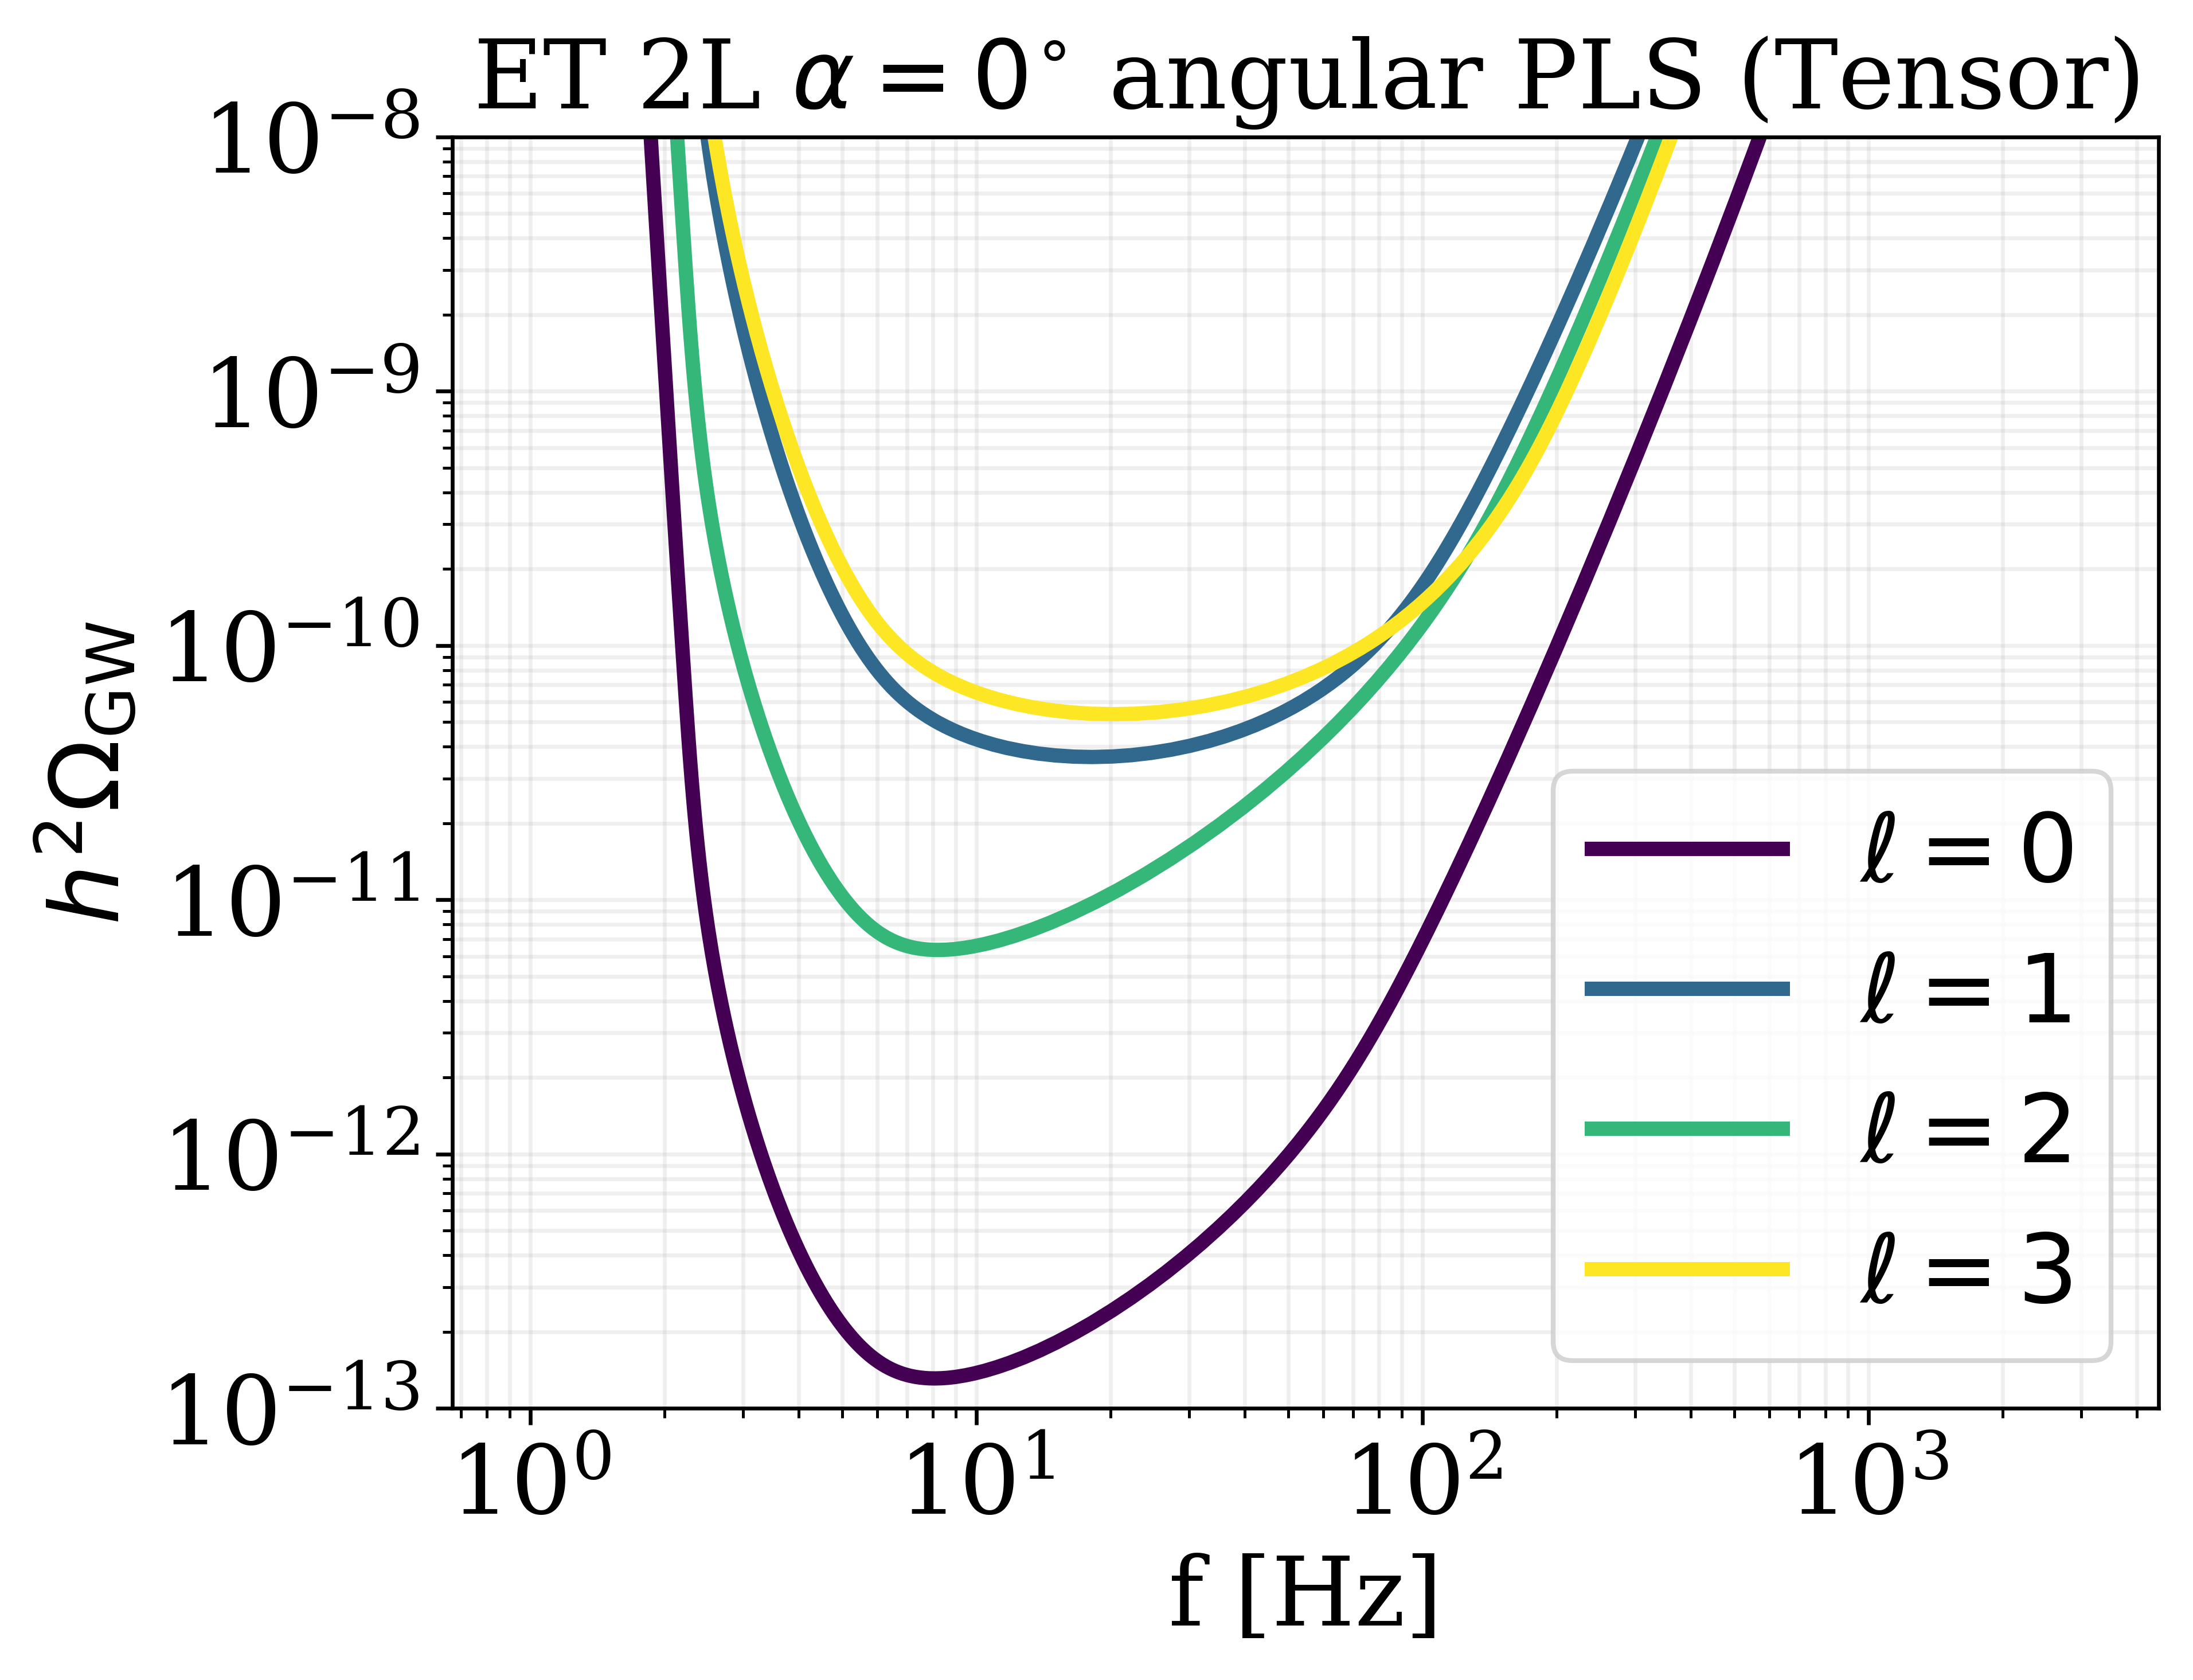

In [44]:
#tensor

pls0_t = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 0, f, 't', 0, fref, snr, Tobs, 1, shift_angle=np.deg2rad(0))
pls1_t = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 1, f, 't', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(0))
pls2_t = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 2, f, 't', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(0))
pls3_t = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 3, f, 't', 0, fref, snr, Tobs, 1e-3,  shift_angle=np.deg2rad(0))


idx_min_0_t = np.argmin(pls0_t)
idx_min_1_t = np.argmin(pls1_t)
idx_min_2_t = np.argmin(pls2_t)
idx_min_3_t = np.argmin(pls3_t)


print("Min pls_0_t:", pls0_t[idx_min_0_t], "f min:", f[idx_min_0_t])
print("Min pls_1_t:", pls1_t[idx_min_1_t], "f min:", f[idx_min_1_t])
print("Min pls_2_t:", pls2_t[idx_min_2_t], "f min:", f[idx_min_2_t])
print("Min pls_3_t:", pls3_t[idx_min_3_t], "f min:", f[idx_min_3_t])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_t, label=r'$\ell=0$', color = colors[0], rasterized=True)
plt.plot(f, pls1_t, label=r'$\ell=1$', color = colors[1], rasterized=True)
plt.plot(f, pls2_t, label=r'$\ell=2$', color = colors[2], rasterized=True)
plt.plot(f, pls3_t, label=r'$\ell=3$', color = colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.ylim(1e-13, 1e-8)
plt.title(r'ET 2L $\alpha=0^{\circ}$ angular PLS (Tensor)')

Min pls_0_v: 1.3178131954378822e-13 f min: 7.970322250704167
Min pls_1_v: 2.3077020060315837e-11 f min: 17.906745794056036
Min pls_2_v: 1.2945700731850498e-11 f min: 8.034456110830362
Min pls_3_v: 5.1136097767315626e-11 f min: 19.09244214355685


Text(0.5, 1.0, 'ET 2L $\\alpha=0^{\\circ}$ angular PLS (Vector)')

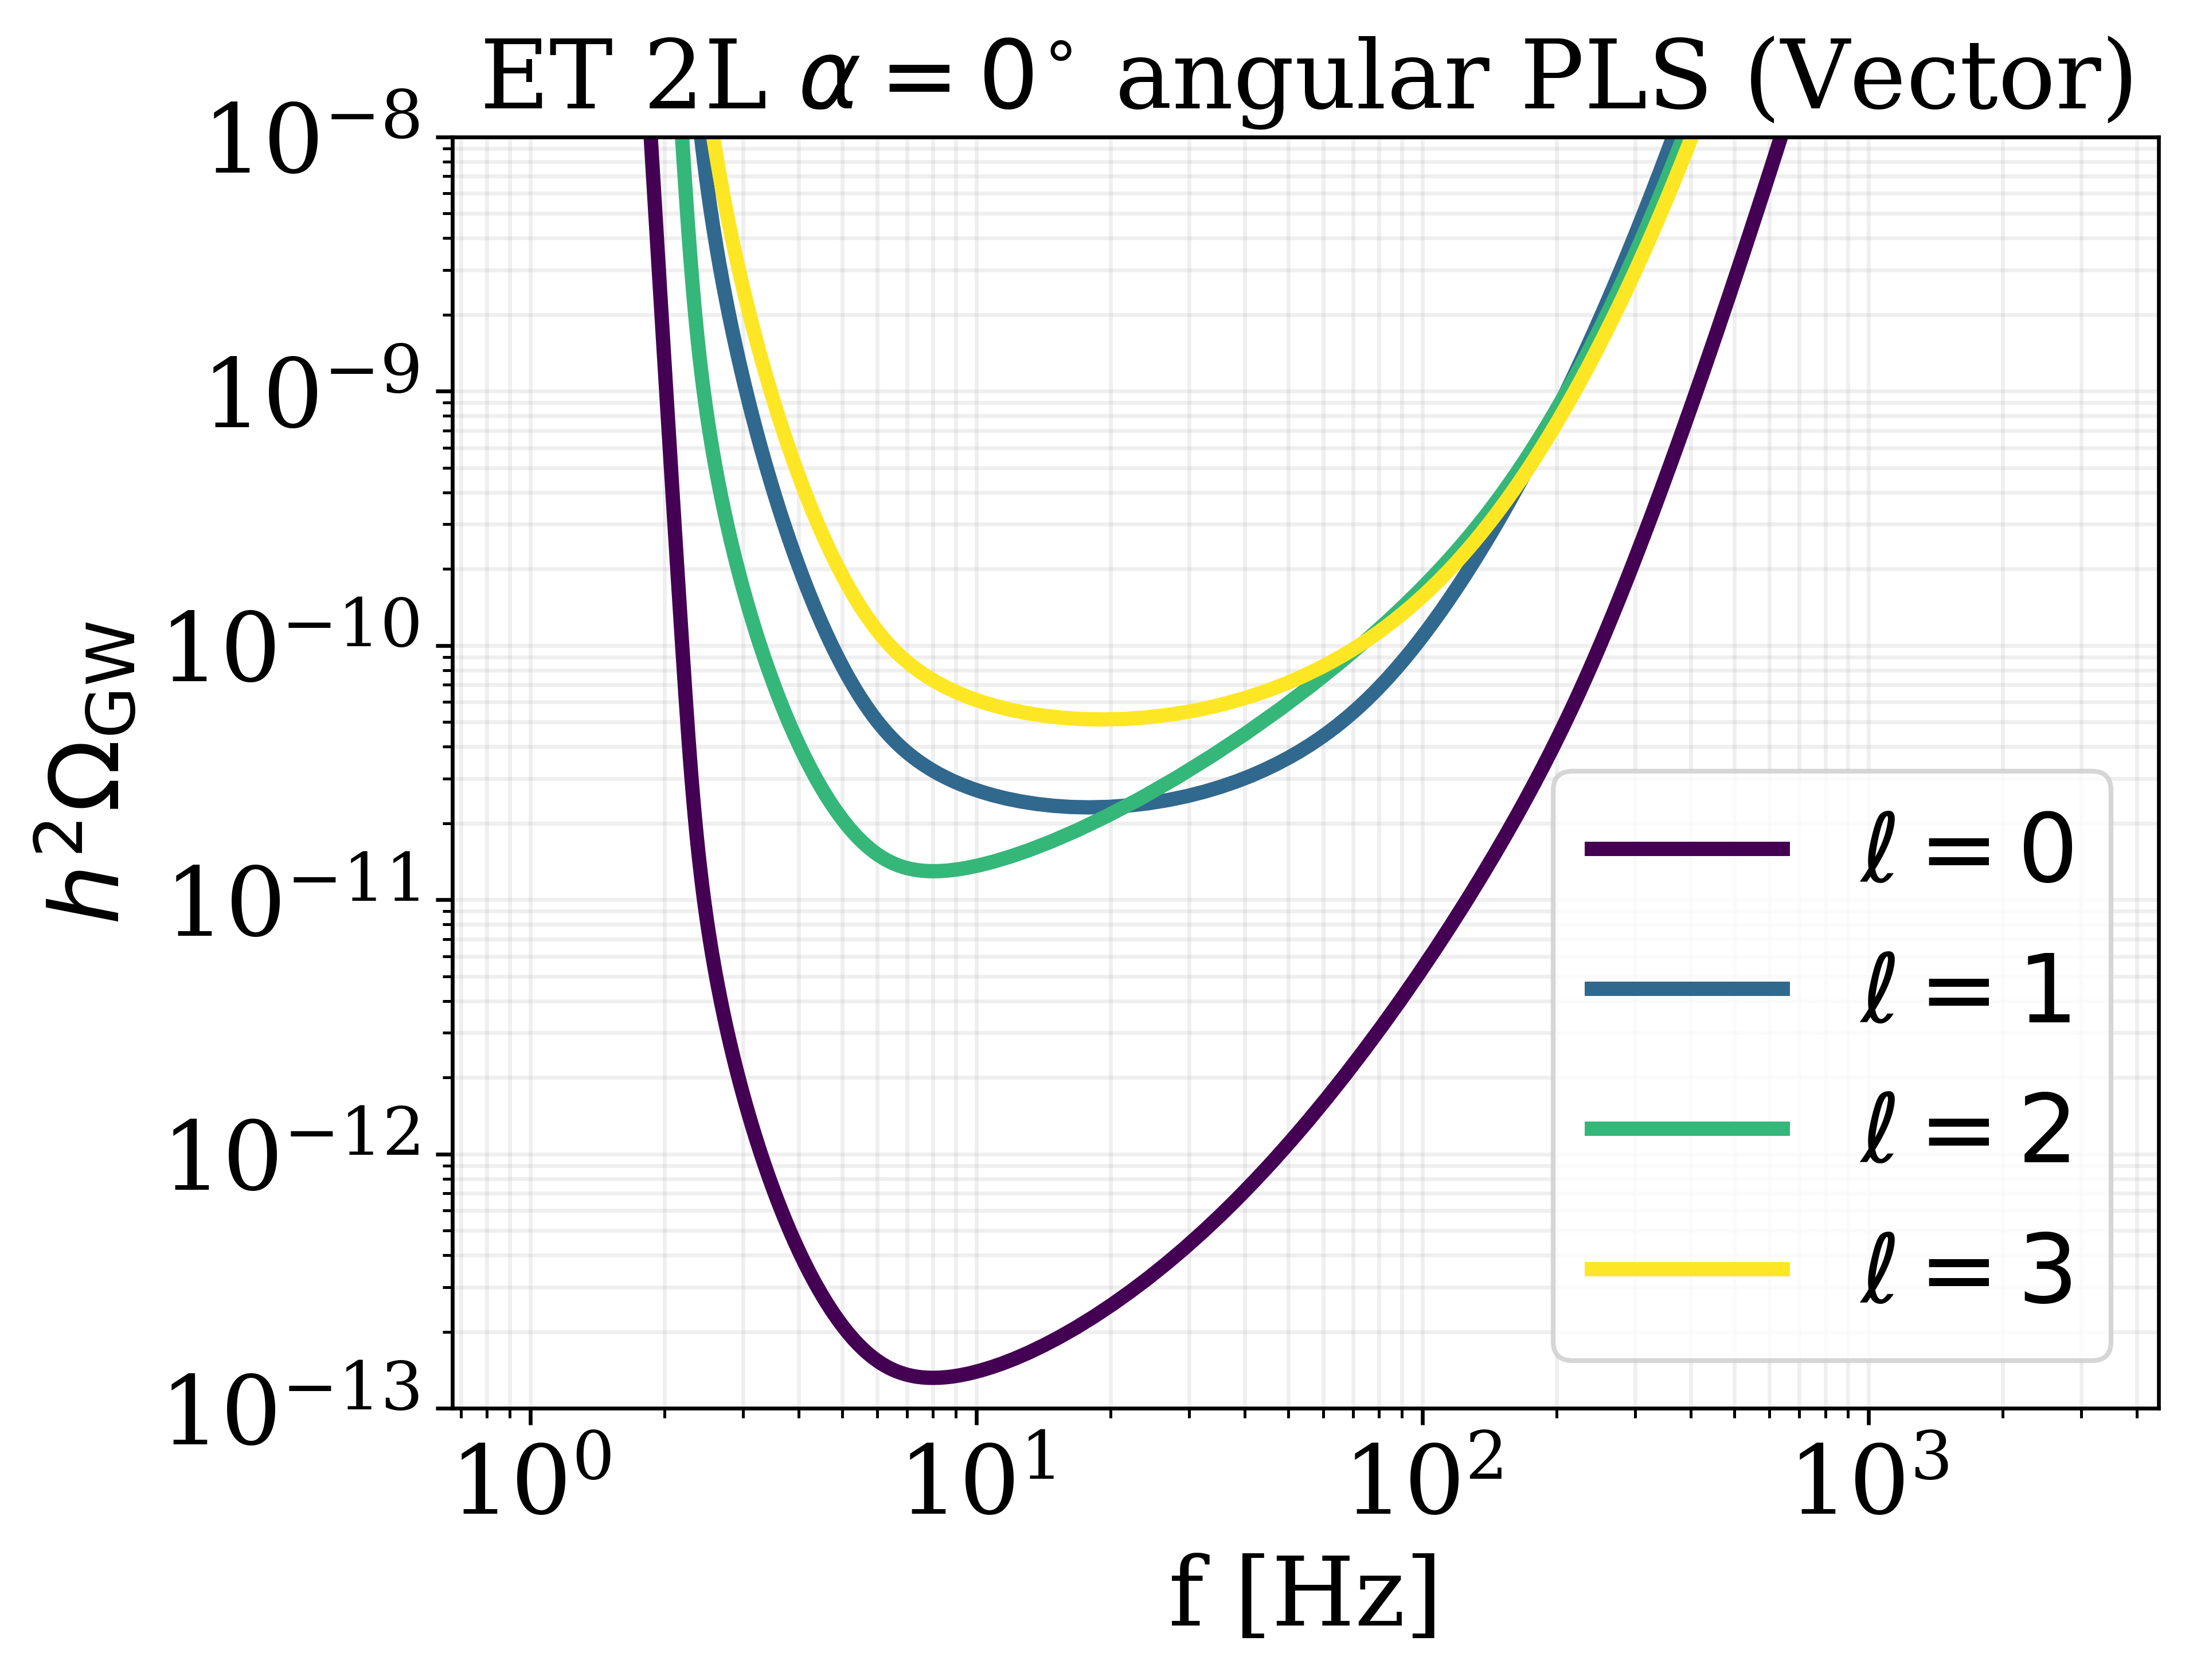

In [45]:
#vector
pls0_v = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 0, f, 'v', 0, fref, snr, Tobs, 1, shift_angle=np.deg2rad(0))
pls1_v = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 1, f, 'v', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(0))
pls2_v = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 2, f, 'v', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(0))
pls3_v = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 3, f, 'v', 0, fref, snr, Tobs, 1e-3,  shift_angle=np.deg2rad(0))

idx_min_0_v = np.argmin(pls0_v)
idx_min_1_v = np.argmin(pls1_v)
idx_min_2_v = np.argmin(pls2_v)
idx_min_3_v = np.argmin(pls3_v)


print("Min pls_0_v:", pls0_v[idx_min_0_v], "f min:", f[idx_min_0_v])
print("Min pls_1_v:", pls1_v[idx_min_1_v], "f min:", f[idx_min_1_v])
print("Min pls_2_v:", pls2_v[idx_min_2_v], "f min:", f[idx_min_2_v])
print("Min pls_3_v:", pls3_v[idx_min_3_v], "f min:", f[idx_min_3_v])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_v, label=r'$\ell=0$', color = colors[0], rasterized=True)
plt.plot(f, pls1_v, label=r'$\ell=1$', color = colors[1], rasterized=True)
plt.plot(f, pls2_v, label=r'$\ell=2$', color = colors[2], rasterized=True)
plt.plot(f, pls3_v, label=r'$\ell=3$', color = colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.ylim(1e-13, 1e-8)
plt.title(r'ET 2L $\alpha=0^{\circ}$ angular PLS (Vector)')


Min pls_0_s: 3.95942915929789e-13 f min: 7.970322250704167
Min pls_1_s: 6.27621116192221e-11 f min: 17.20337511366467
Min pls_2_s: 1.9303093966677717e-11 f min: 8.099106029389995
Min pls_3_s: 9.376839383165938e-11 f min: 16.660623554999358


Text(0.5, 1.0, 'ET 2L $\\alpha=0^{\\circ}$ angular PLS (Scalar)')

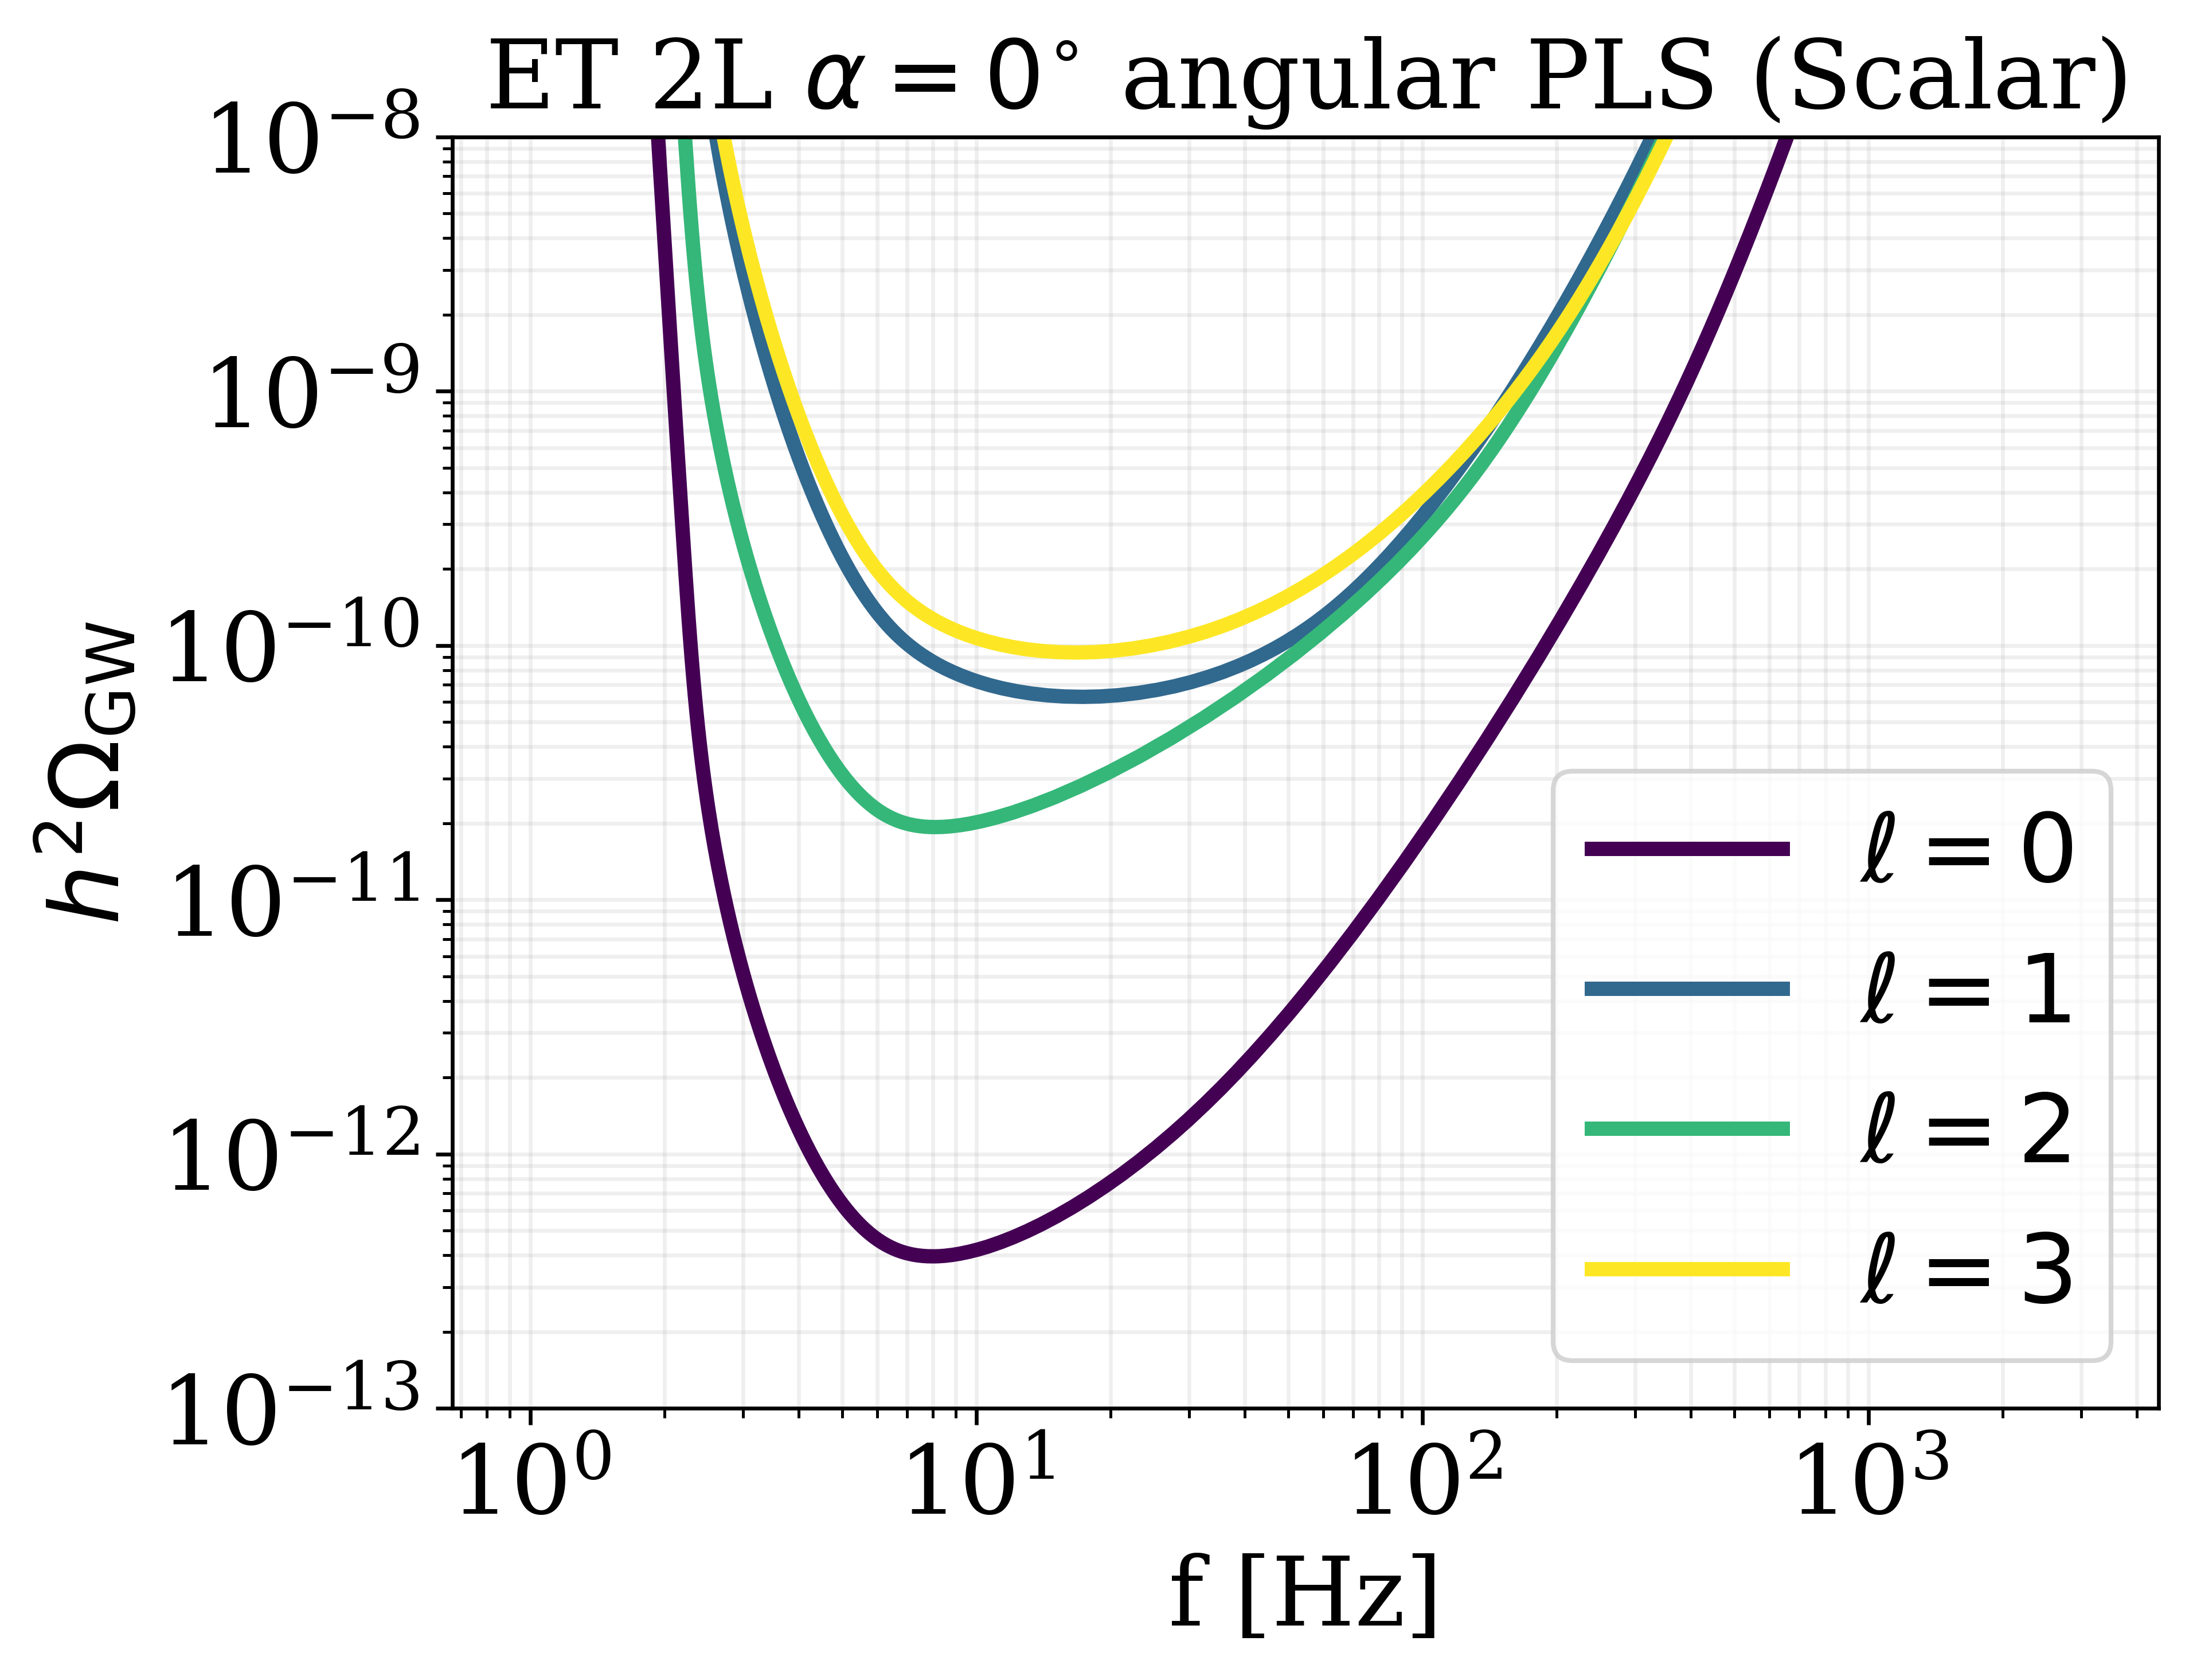

In [46]:
#scalar

pls0_s = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 0, f, 's', 0, fref, snr, Tobs, 1, shift_angle=np.deg2rad(0))
pls1_s = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 1, f, 's', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(0))
pls2_s = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 2, f, 's', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(0))
pls3_s = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 3, f, 's', 0, fref, snr, Tobs, 1e-3,  shift_angle=np.deg2rad(0))


idx_min_0_s = np.argmin(pls0_s)
idx_min_1_s = np.argmin(pls1_s)
idx_min_2_s = np.argmin(pls2_s)
idx_min_3_s = np.argmin(pls3_s)


print("Min pls_0_s:", pls0_s[idx_min_0_s], "f min:", f[idx_min_0_s])
print("Min pls_1_s:", pls1_s[idx_min_1_s], "f min:", f[idx_min_1_s])
print("Min pls_2_s:", pls2_s[idx_min_2_s], "f min:", f[idx_min_2_s])
print("Min pls_3_s:", pls3_s[idx_min_3_s], "f min:", f[idx_min_3_s])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_s, label=r'$\ell=0$', color = colors[0], rasterized=True)
plt.plot(f, pls1_s, label=r'$\ell=1$', color = colors[1], rasterized=True)
plt.plot(f, pls2_s, label=r'$\ell=2$', color = colors[2], rasterized=True)
plt.plot(f, pls3_s, label=r'$\ell=3$', color = colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.ylim(1e-13, 1e-8)
plt.title(r'ET 2L $\alpha=0^{\circ}$ angular PLS (Scalar)')

Min pls_0_V: 3.5608965716940024e-10 f min: 100.31042432468787
Min pls_1_V: 3.912206809422978e-11 f min: 8.099106029389995
Min pls_2_V: 4.637573482698083e-10 f min: 18.940039541935587
Min pls_3_V: 5.91006396226658e-11 f min: 8.099106029389995


Text(0.5, 1.0, 'ET 2L $\\alpha=0^{\\circ}$ angular PLS (V)')

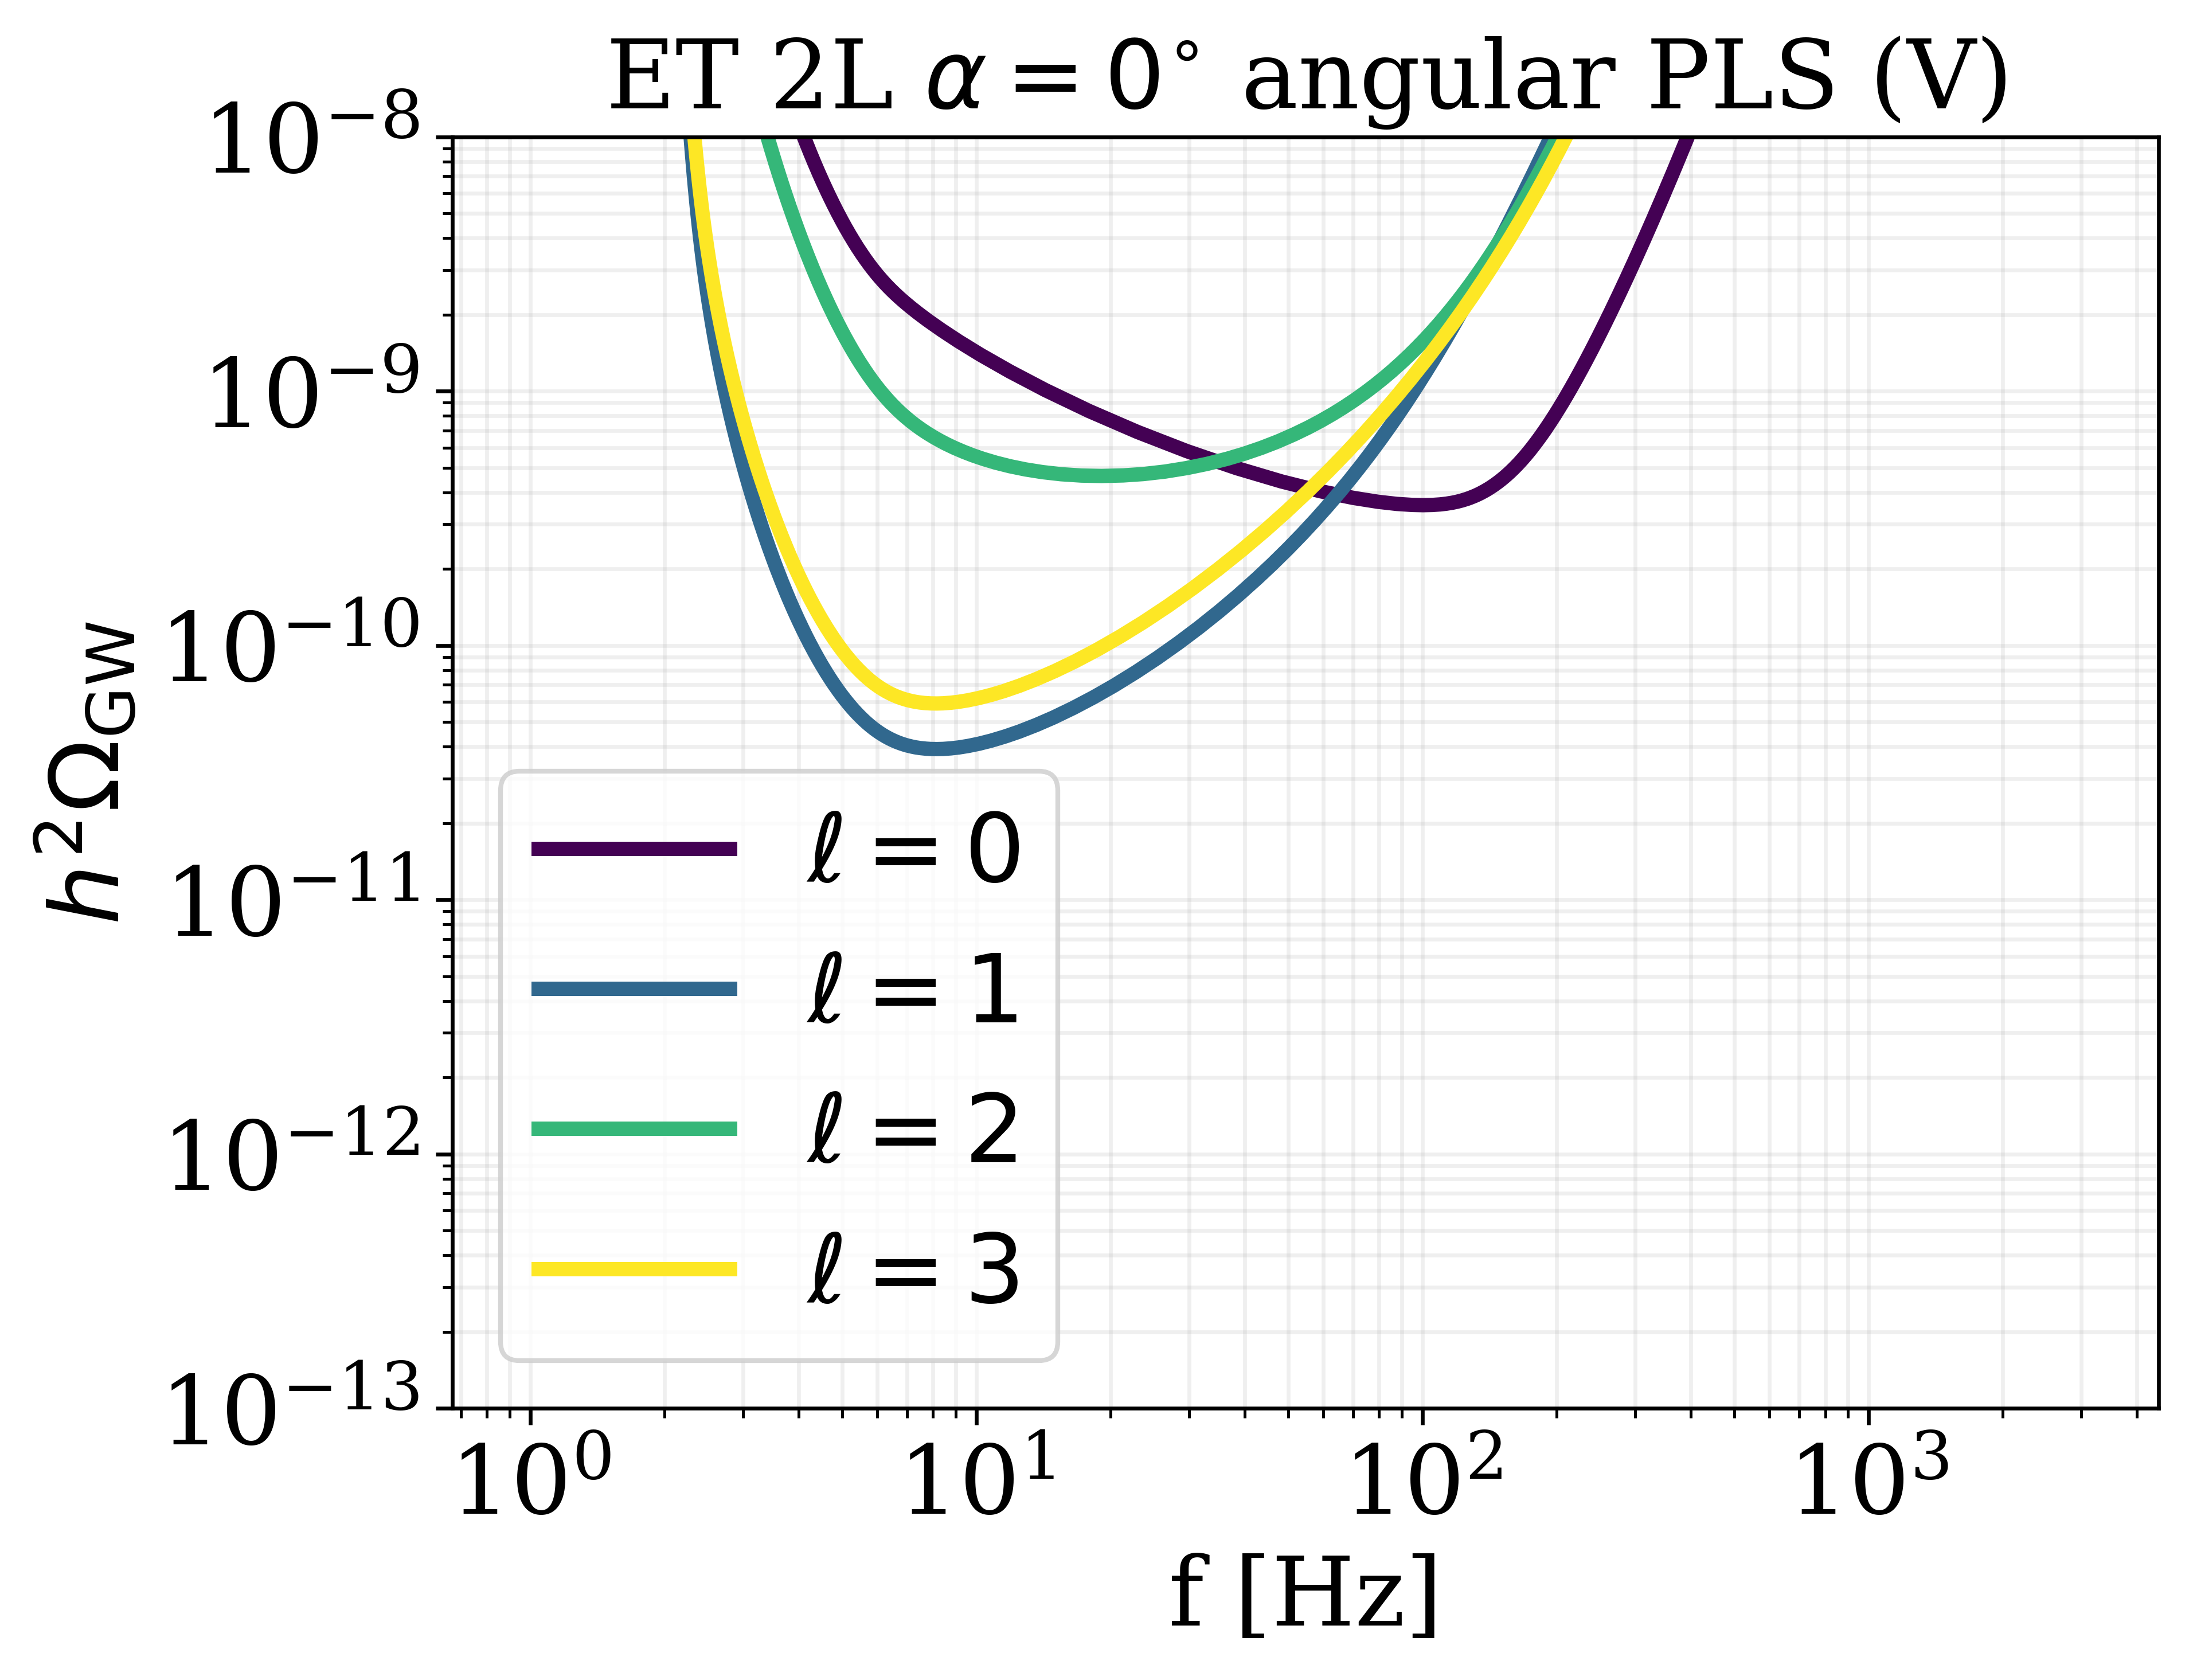

In [47]:
# V

pls0_V = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 0, f, 'V', 0, fref, snr, Tobs, 1, shift_angle=np.deg2rad(0))
pls1_V = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 1, f, 'V', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(0))
pls2_V = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 2, f, 'V', 0, fref, snr, Tobs, 1e-3, shift_angle=np.deg2rad(0))
pls3_V = Sensitivity_ell.APLS_ell('ET L1', 'ET L2', 3, f, 'V', 0, fref, snr, Tobs, 1e-3,  shift_angle=np.deg2rad(0))


idx_min_0_V = np.argmin(pls0_V)
idx_min_1_V = np.argmin(pls1_V)
idx_min_2_V = np.argmin(pls2_V)
idx_min_3_V = np.argmin(pls3_V)


print("Min pls_0_V:", pls0_V[idx_min_0_V], "f min:", f[idx_min_0_V])
print("Min pls_1_V:", pls1_V[idx_min_1_V], "f min:", f[idx_min_1_V])
print("Min pls_2_V:", pls2_V[idx_min_2_V], "f min:", f[idx_min_2_V])
print("Min pls_3_V:", pls3_V[idx_min_3_V], "f min:", f[idx_min_3_V])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_V, label=r'$\ell=0$', color = colors[0], rasterized=True)
plt.plot(f, pls1_V, label=r'$\ell=1$', color = colors[1], rasterized=True)
plt.plot(f, pls2_V, label=r'$\ell=2$', color = colors[2], rasterized=True)
plt.plot(f, pls3_V, label=r'$\ell=3$', color = colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.ylim(1e-13, 1e-8)
plt.title(r'ET 2L $\alpha=0^{\circ}$ angular PLS (V)')

* ET 2L $\alpha=0^{\circ}$ + CE sensitivity to X polarization modes

Min pls_t: 1.794881019740305e-12 f min: 16.100930836621426
Min pls_v: 3.60353186270314e-12 f min: 16.66732866719663


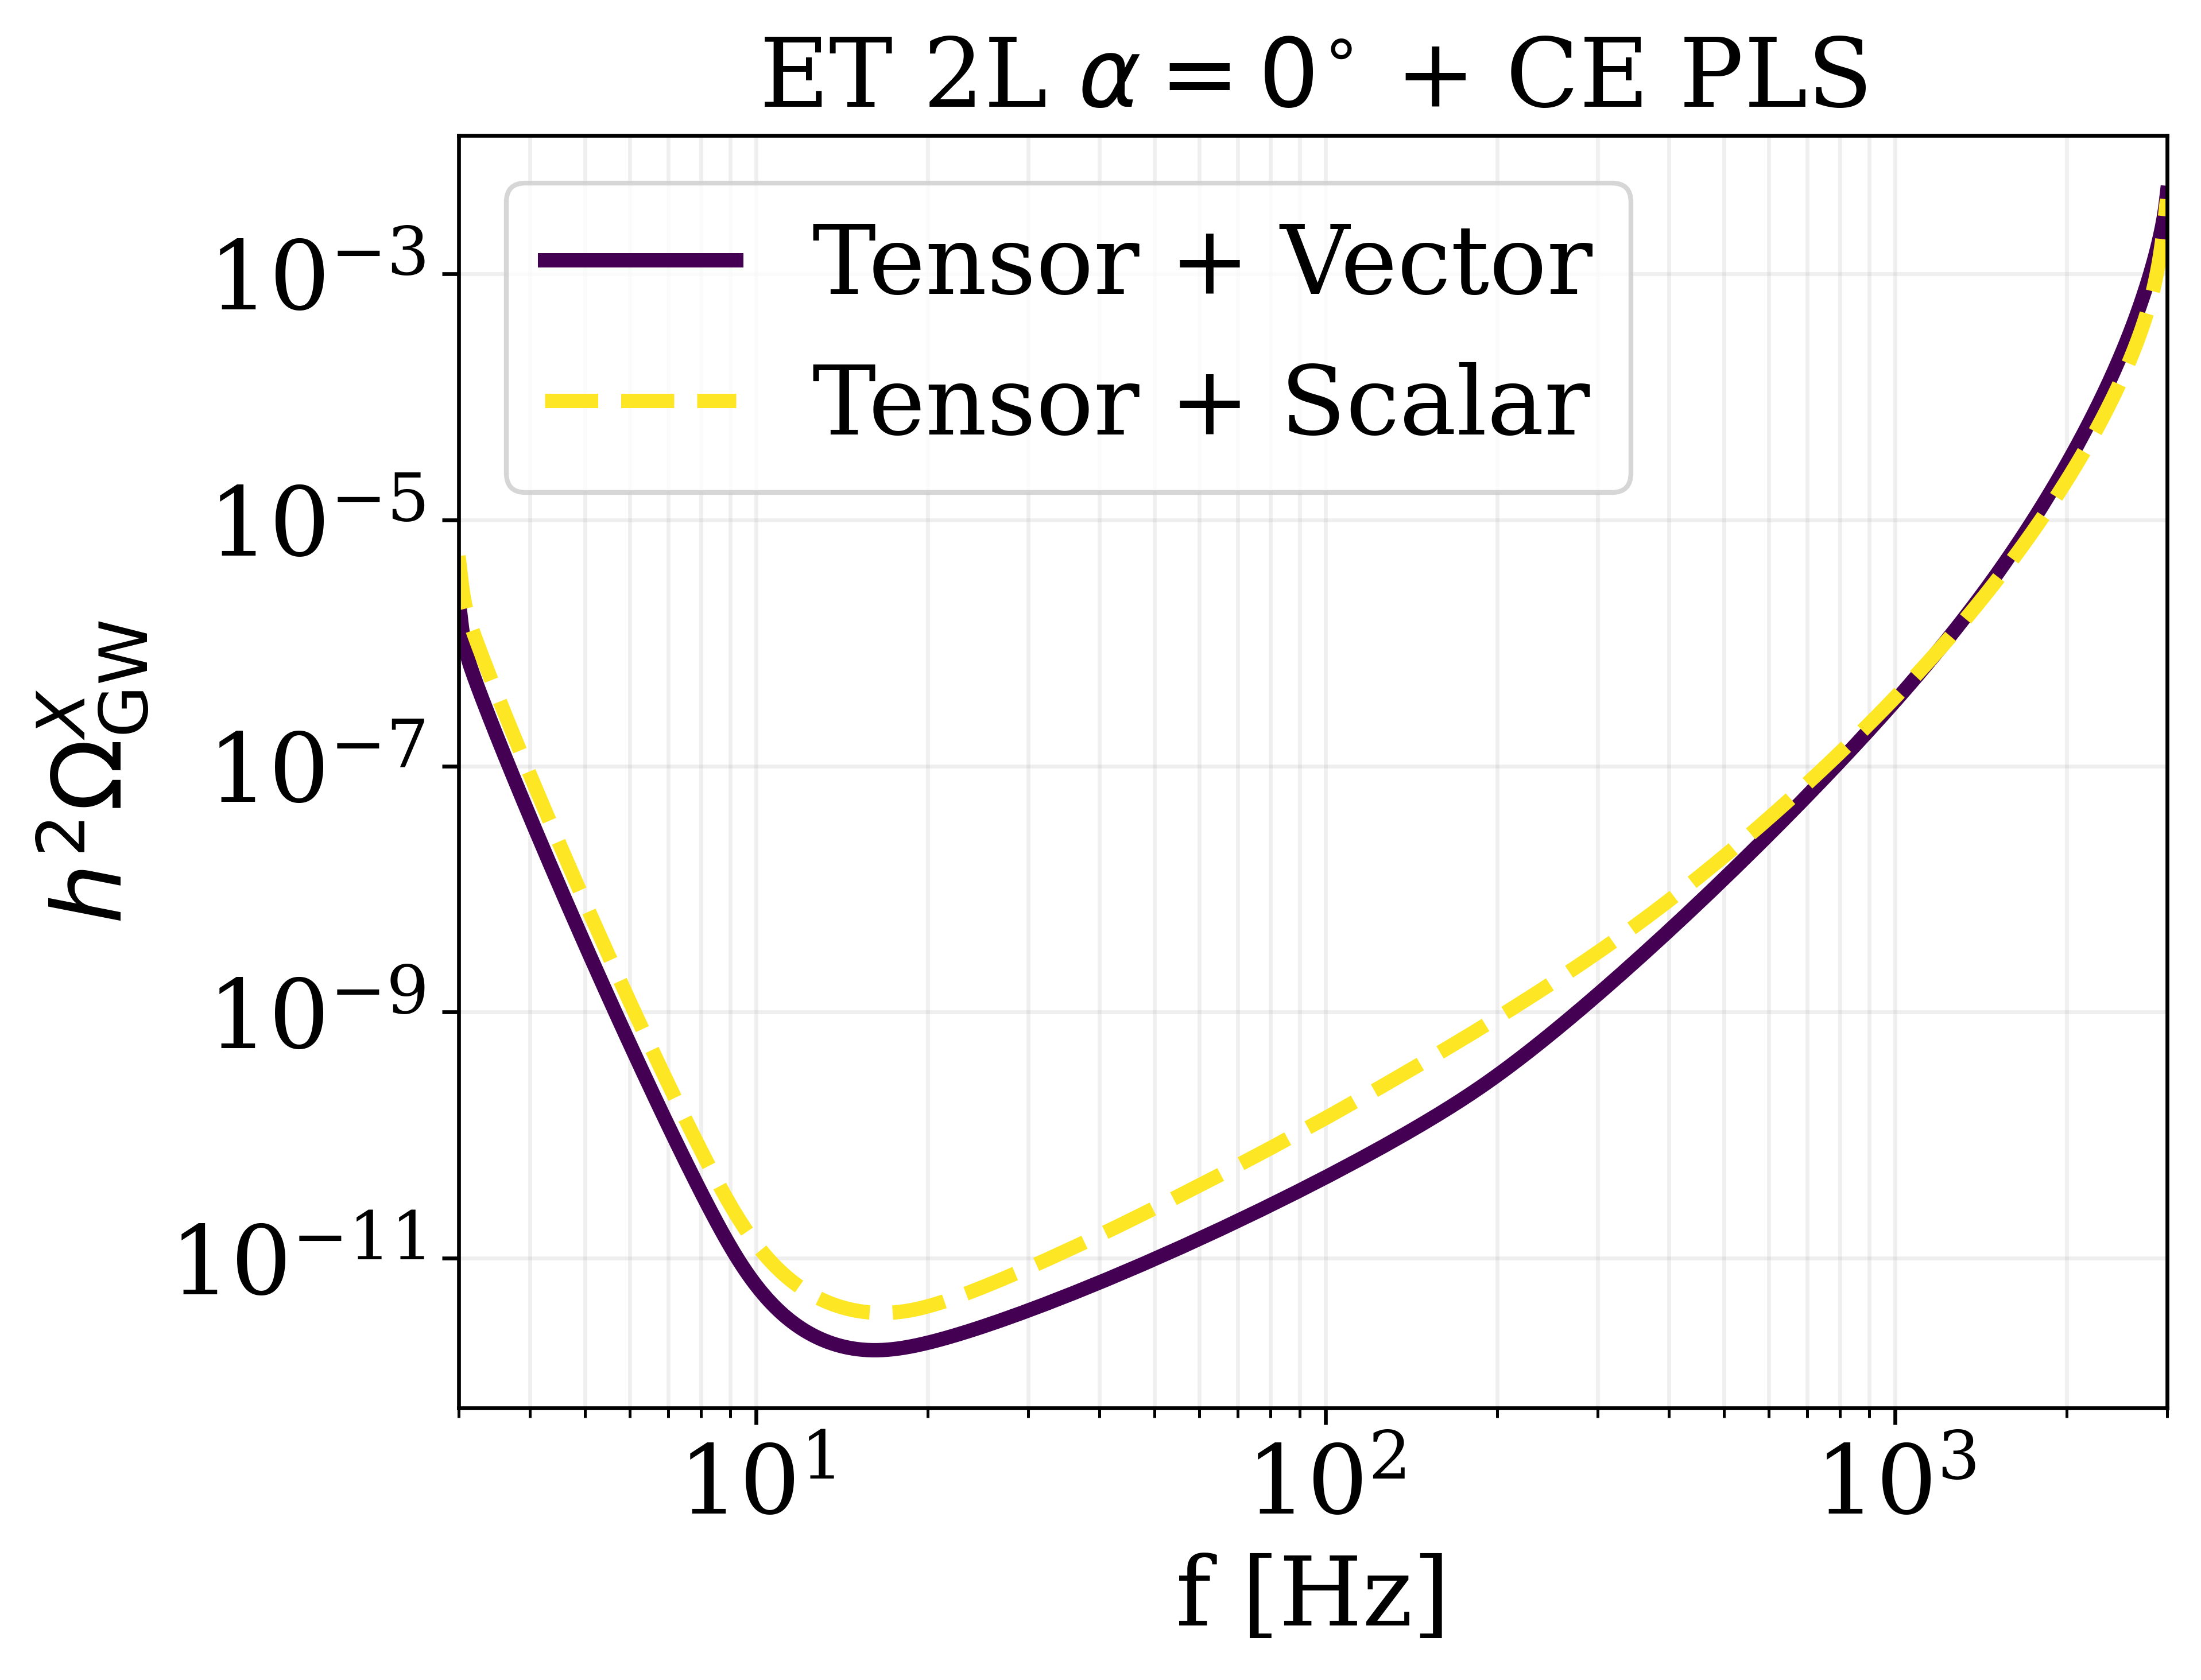

In [48]:
f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1

pls_tv_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, 0, np.deg2rad(0))
pls_ts_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, 0, np.deg2rad(0))

idx_min_tv = np.argmin(pls_tv_etCE)
idx_min_ts = np.argmin(pls_ts_etCE)

print("Min pls_t:", pls_tv_etCE[idx_min_tv], "f min:", f[idx_min_tv])
print("Min pls_v:", pls_ts_etCE[idx_min_ts], "f min:", f[idx_min_ts])

colors = plt.cm.viridis(np.linspace(0, 1, 2))
plt.plot(f, pls_tv_etCE, label='Tensor + Vector', color=colors[0], rasterized=True)
plt.plot(f, pls_ts_etCE, label='Tensor + Scalar', linestyle='--', color=colors[1], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}^X$')
plt.xlim(3, 3e3)
plt.title(r'ET 2L $\alpha=0^{\circ}$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

Min pls_t: 1.1707323261557668e-11 f min: 44.80179648372757
Min pls_v: 1.4692517983068998e-11 f min: 39.286050614480004
Min pls_s: 3.2009432251154474e-11 f min: 34.44937243630533


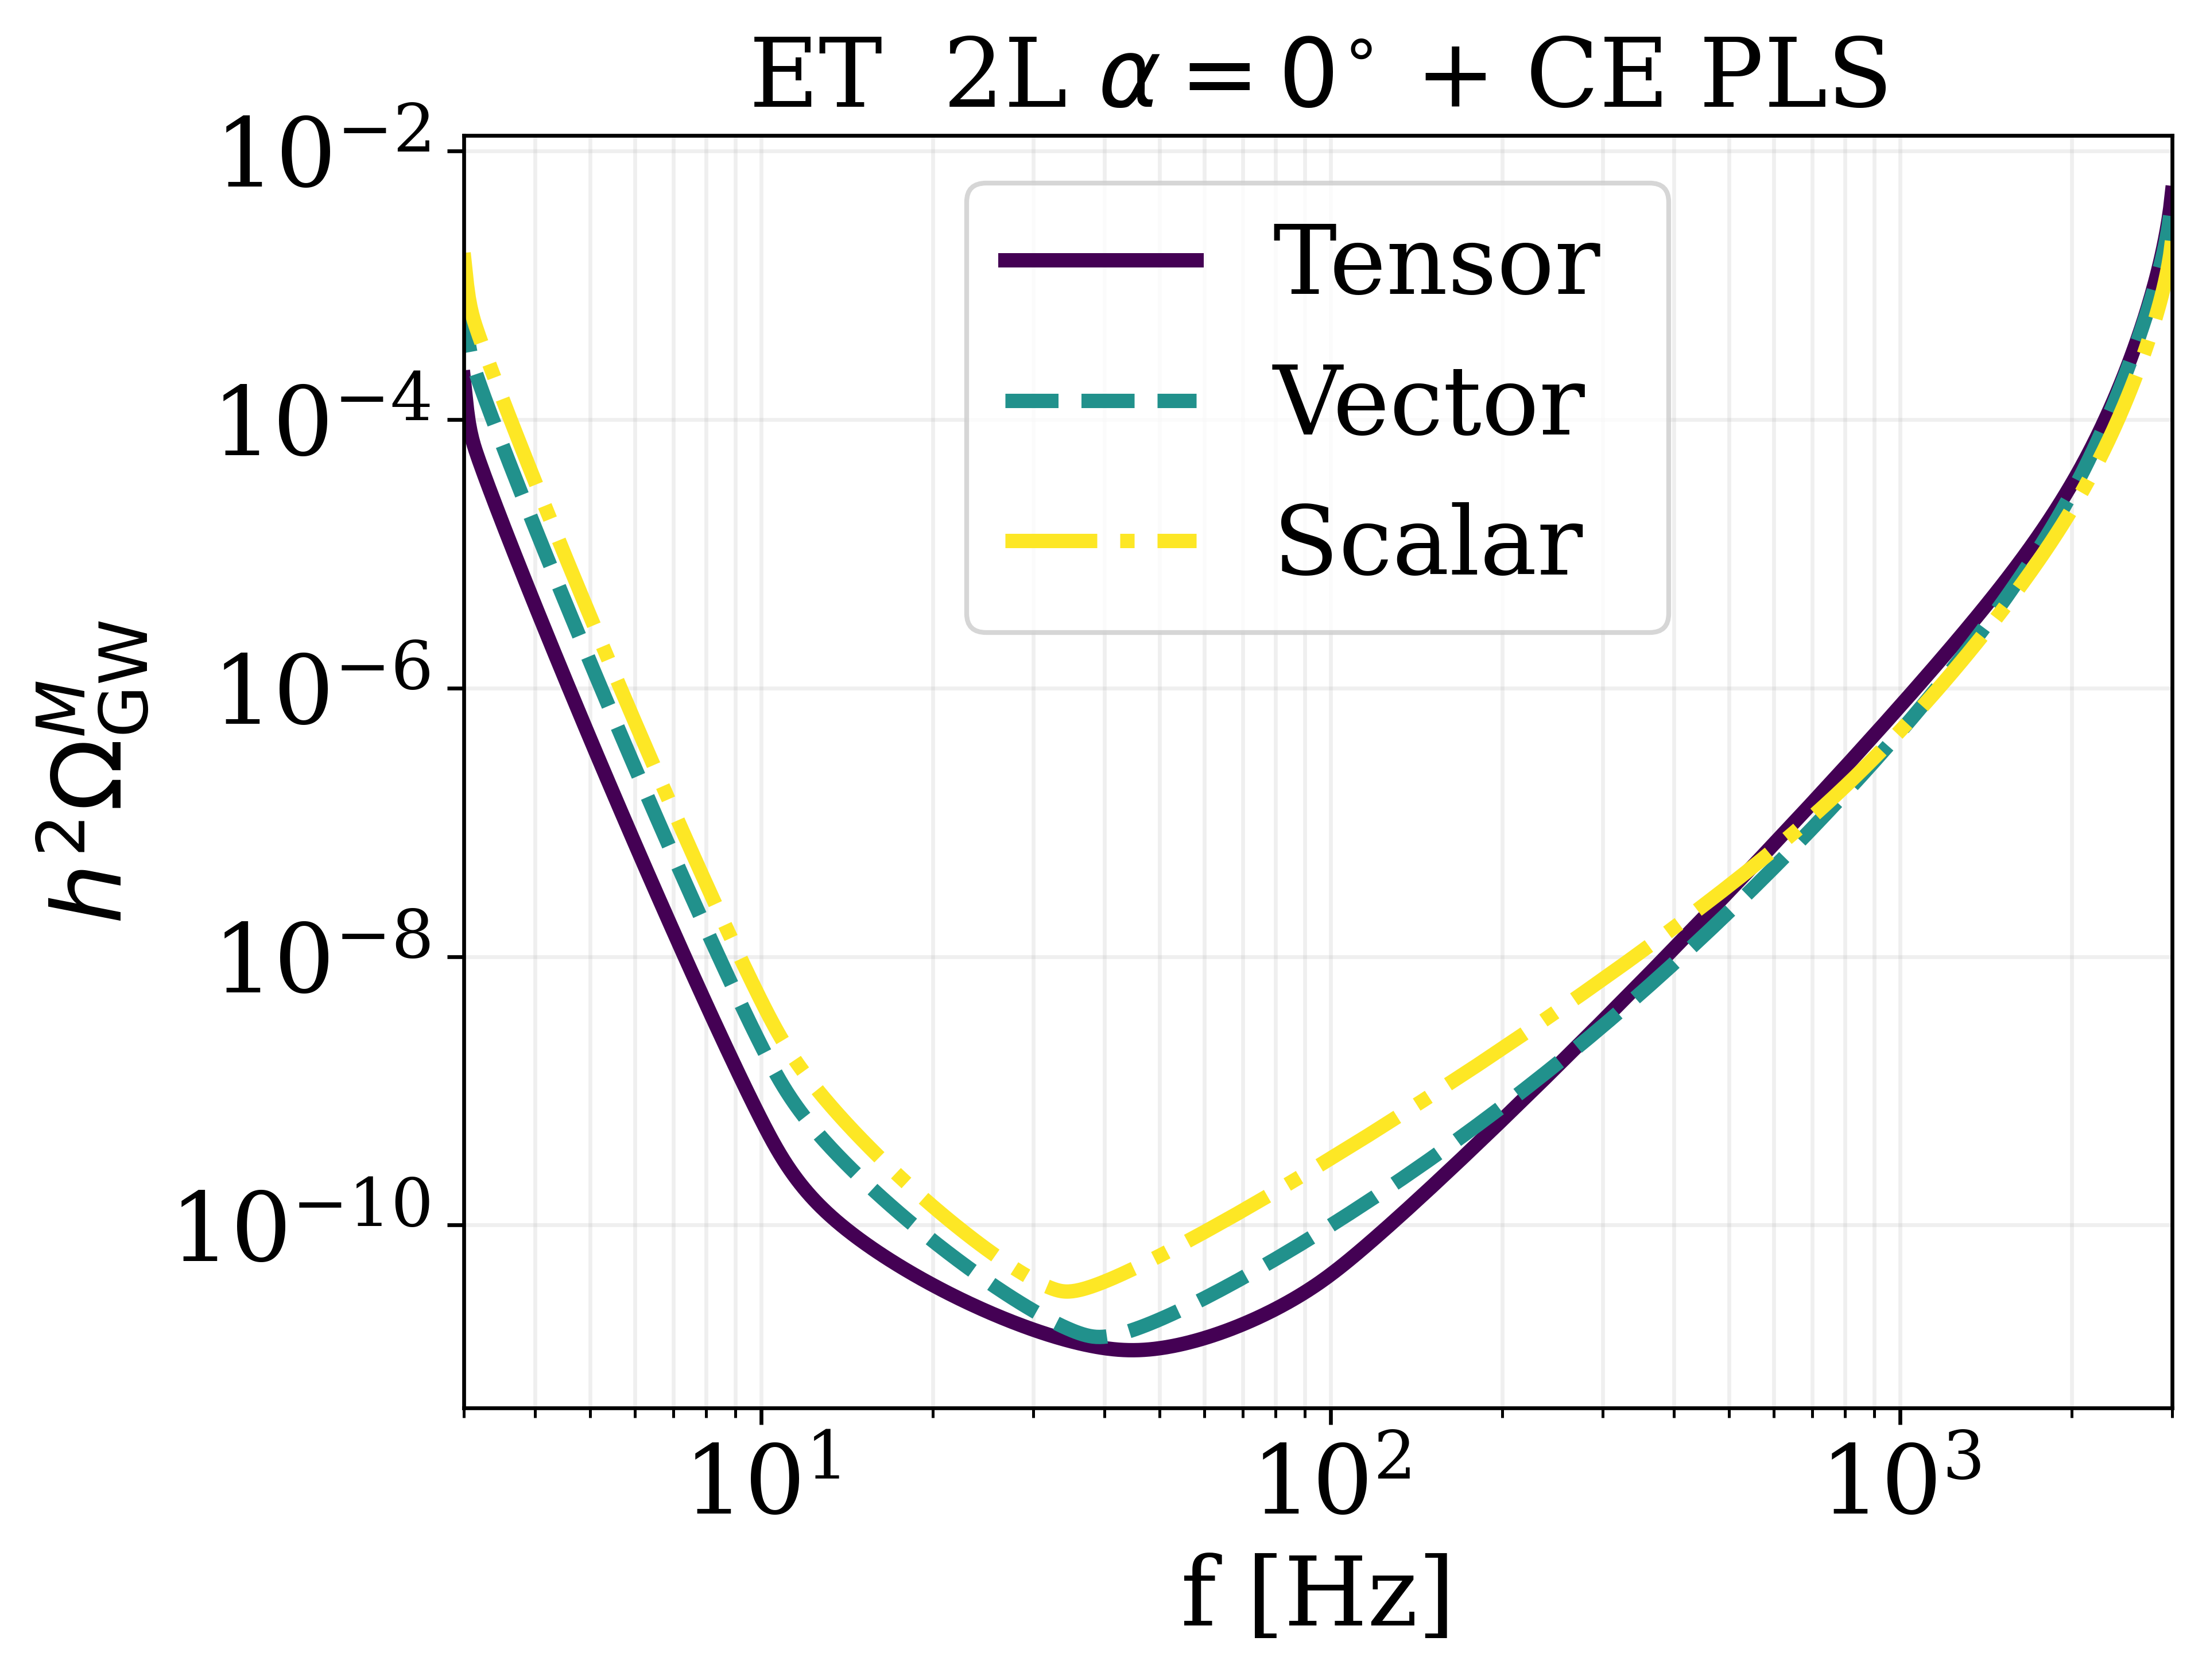

In [49]:
# tensor + vector + scalar modes

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1

pls_t_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 't', snr, Tobs, 0, np.deg2rad(0))
pls_v_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, 0, np.deg2rad(0))
pls_s_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, 0, np.deg2rad(0))

idx_min_t = np.argmin(pls_t_etCE)
idx_min_v = np.argmin(pls_v_etCE)
idx_min_s = np.argmin(pls_s_etCE)

print("Min pls_t:", pls_t_etCE[idx_min_t], "f min:", f[idx_min_t])
print("Min pls_v:", pls_v_etCE[idx_min_v], "f min:", f[idx_min_v])
print("Min pls_s:", pls_s_etCE[idx_min_s], "f min:", f[idx_min_s])

colors = plt.cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, pls_t_etCE, label='Tensor ', color=colors[0], rasterized=True)
plt.plot(f, pls_v_etCE, label='Vector', linestyle='--', color=colors[1], rasterized=True)
plt.plot(f, pls_s_etCE, label='Scalar', linestyle='-.', color=colors[2], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}^{M}$')
plt.title(r'ET  2L $\alpha = 0^{\circ}$ + CE PLS')
plt.xlim(3, 3e3)
plt.grid(alpha=0.2, which='both')
plt.legend()